# Quelques éléments de thermodynamique de l'atmosphère
----------------------------

*Ressource d'accompagnement des nouveaux programmes de physique-chimie de PCSI, TPC1 et BCPST1.*


## A - Equilibre hydrostatique
*(PCSI,TPC1 et BCPST1)*

L'équilibre hydrostatique de l'air dans le champ de pesanteur uniforme se traduit, dans le référentiel terrestre galiléen, par la relation
$$ \; $$
$$ \dfrac{\mathrm{d}P}{\mathrm{d}z}(z)=-\rho(z)\, g\;, $$
$$\; $$
où $z$ désigne l'altitude comptée depuis le sol, $P(z)$ le champ de pression de l'air, $g=9,\!81\,\mathrm{m}\cdot\mathrm{s}^{-2}$ l'intensité de la pesanteur terrestre supposée uniforme, et $\rho(z)$ le champ de masse volumique de l'air.

L'air est assimilé à un gaz parfait de masse molaire $M_a=29,\!0\times 10^{-3}\,\mathrm{kg}\cdot\mathrm{mol}^{-1}$:

$$
P(z)=\rho(z)\dfrac{R}{M_a}T(z)\,.
$$

### Modèle de l'atmosphère isotherme

On considère le modèle simplifié où la température est uniforme: $T(z)=T_0$. L'équilibre hydrostatique conduit à:
$$
\dfrac{\mathrm{d}P}{\mathrm{d}z}+\dfrac{P}{H}=0\,, $$
où $H=\dfrac{RT_0}{M_a g}$ est l'échelle caractéristique de variation de la pression.

In [ ]:
## Import des bibliothèques utiles

import numpy as np                      # pour manipuler des tableaux de façon performante
import matplotlib.pyplot as plt         # pour tracer des graphes
from scipy.integrate import odeint      # pour l'intégration numérique des équations différentielles
 
## Constantes numériques

M_a = 29.0e-3                             # masse molaire de l'air (en kg/mol)
g = 9.81                                # intensité de la pesanteur (N/kg)
R = 8.314                               # constante des gaz parfaits (J/K/mol)
Tsol = 288                              # température au sol (K) 
Psol = 1.013e5                          # pression au sol (Pa) 
 
## Fonction qui retourne la valeur de H pour une valeur T de la température passée en paramètre

def H(T):
  return (R*T)/(M_a*g)
 
print ("H = %.2e" % H(Tsol))     # écrit la valeur de H pour une température égale à Tsol en conservant deux chiffres après la virgule

H = 8.42e+03


In [ ]:
## Fonction qui définit la pression dans le modèle de l'atmosphère isotherme

def P_isoT(z,T):
  return Psol*np.exp(-z/H(T))

### Le profil standard ISA

Dans le cadre du [modèle ISA](https://fr.wikipedia.org/wiki/Atmosphère_normalisée) (International Standard Atmosphere), l'atmosphère est divisée en différentes couches, au sein desquelles la température est supposée suivre une loi affine. La valeur du gradient vertical de température dans chacune de ces couches est normalisée.

On propose ici de déterminer numériquement la loi de variation de la pression atmosphérique avec l'altitude $z$ dans le cadre du modèle ISA, en supposant que l'atmosphère est un gaz parfait au repos dans le référentiel terrestre galiléen et en négligeant les variations de la pesanteur avec l'altitude. On fixe les valeurs de la température et de la pression au niveau du sol (en $z = 0$) respectivement à $T(z=0)=T_\mathrm{sol}=288\,\mathrm{K}$ et $P(z=0)=P_0=1013\,\mathrm{hPa}$.

In [ ]:
## Fonction qui définit le gradient vertical de température dans le modèle ISA

def kISA(z):
    """ z est l'altitude en mètres. La fonction renvoie la valeur du gradient thermique
    vertical à l'altitude z (en K/m). """
    if 0 <= z < 11e3: return -6.5e-3
    elif z < 20e3: return 0
    elif z < 32e3: return 1.0e-3
    elif z < 47e3: return 2.8e-3
    elif z < 51e3: return 0
    elif z < 71e3: return -2.8e-3
    elif z < 85e3: return -2.0e-3
    else: return None

Les champs de température et de pression se déduisent par intégration du système différentiel suivant :
$$\; $$
$$\begin{cases} \dfrac{\mathrm{d}T}{\mathrm{d} z}(z)=k_{\rm ISA}(z) \\[3mm] \dfrac{\mathrm{d}P}{\mathrm{d} z}(z)=-\dfrac{M_a g}{R T(z)}P(z)  \end{cases}$$
$$\; $$

On propose de conduire la résolution numérique au moyen de la fonction `odeint`, disponible dans le module `scipy.integrate`, et dont l'importation a été réalisée plus haut. L'appel de la fonction `odeint` requiert les trois arguments suivants :

* la fonction définissant le système différentiel à résoudre, qui doit elle-même présenter impérativement deux arguments : le vecteur inconnu que l'on souhaite déterminer, suivi de la variable d'influence par rapport à laquelle on conduit l'intégration numérique du système ;

* les conditions initiales/aux limites du problème, données sous forme d'une liste ou d'un tableau `numpy` à une dimension ;

* le tableau `numpy` des valeurs de $z$ pour lesquelles on cherche à obtenir une estimation numérique de la solution ; le premier élément de ce tableau doit impérativement correspondre à "l'endroit" où les conditions initiales/aux limites précédemment données s'appliquent. 

L'ordre de passage indiqué ci-dessus doit impérativement être respecté ; d'autres arguments optionnels peuvent être ajoutés (consultez la [documentation en ligne](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)).

In [ ]:
## Définition du système différentiel à résoudre
    
def systDiff(TP,z):
    """ 
    TP désigne le vecteur inconnu de dimension 2 (TP[0] : température ; TP[1] : pression) ;
    z désigne l'altitude. 
    La fonction renvoie respectivement la dérivée de la température et la dérivée de
    la pression à l'altitude z.
    """
    # Lois prévues par le modèle théorique
    dTsurdz = kISA(z)                    # dérivée verticale de la température
    dPsurdz = - M_a*g/R*TP[1]/TP[0]     # dérivée verticale de la pression
    
    return [dTsurdz, dPsurdz]
 
## Définition des conditions aux limites
 
CAL = [Tsol, Psol]
 
## Définition de l'ensemble des valeurs de z pour lesquelles on cherche la solution
## numérique approchée du système différentiel précédent
 
z = np.linspace(0, 85e3, 10000)     # on choisit 10000 points régulièrement espacés entre 0
                                    # et 85 km d'altitude


Vient maintenant l'étape de résolution en elle-même. Le résultat de l'appel de la fonction `odeint`, stocké dans la variable nommée TP, est un tableau `numpy` à deux dimensions, dont le nombre de lignes correspond au nombre de valeurs de $z$, et le nombre de colonnes correspond à la dimension du vecteur inconnu. Ici, la première colonne (d'indice 0 en langage Python) correspond donc à l'ensemble des valeurs numériques de $T$ sur l'intervalle de résolution, tandis que la colonne suivante (d'indice 1 en langage Python) correspond à l'ensemble des valeurs numériques de $P$ sur ce même intervalle. On opère ensuite la "séparation" des colonnes du tableau TP. Deux tableaux indépendants pointent vers le contenu du tableau TP et correspondent respectivement aux valeurs de $T$ et aux valeurs de $P$.

In [ ]:
## La résolution en elle-même
                                    
TP = odeint(systDiff, CAL, z)       # résolution du système différentiel avec odeint
T_ISA = TP[:,0]                     # définition d'un tableau qui pointe vers les valeurs de la température
P_ISA = TP[:,1]                     # définition d'un tableau qui pointe vers les valeurs de la pression
condition = (T_ISA<=Tsol)           # on définit un tableau qui contient les valeurs True ou False selon que chaque élément du tableau T_ISA 
                                    # est inférieur ou égal, ou supérieur à la température au sol. Le tableau de booléens "condition" est un masque qui va 
                                    # permettre d'extraire les valeurs de T_ISA qui respectent la condition ainsi définie.
T_ISA_2=T_ISA[condition]            # on définit un nouveau tableau qui ne contient les valeurs de T_ISA que si elles sont inférieures ou égales à Tsol
Tmoy=T_ISA_2.mean()                 # on définit la température moyenne dans l'ensemble des couches atmosphériques.
print ("Température moyenne dans l'atmosphère = %.1f K" % Tmoy)

Température moyenne dans l'atmosphère = 234.2 K


On passe maintenant à la représentation graphique des résultats.

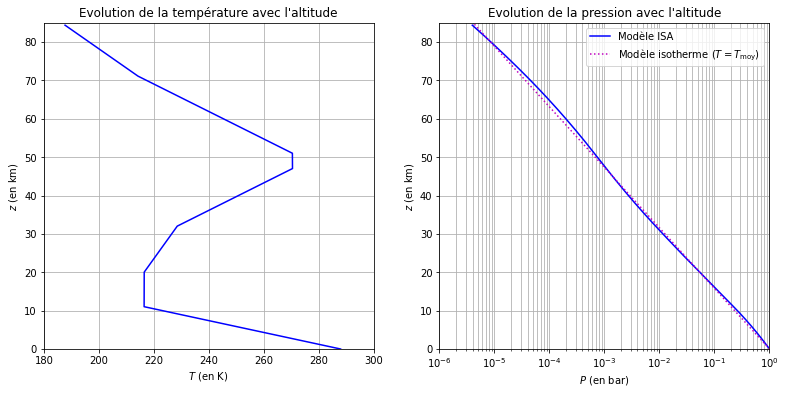

In [ ]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)                  # graphique de gauche
plt.title("Evolution de la température avec l'altitude")
plt.plot(T_ISA, z*1e-3, 'b-')
plt.xlim(180,300), plt.xlabel(r"$T$ (en K)")
plt.ylim(0,85), plt.ylabel(r"$z$ (en km)")
plt.grid()
plt.subplot(1,2,2)                  # graphique de droite
plt.title("Evolution de la pression avec l'altitude")
plt.semilogx(P_ISA*1e-5, z*1e-3, 'b-', label = "Modèle ISA")
plt.semilogx(P_isoT(z,Tmoy)*1e-5, z*1e-3,'m:', label = r"Modèle isotherme ($T=T_{\rm moy}$)")
plt.xlim(1e-6,1), plt.xlabel(r"$P$ (en bar)")
plt.ylim(0,85), plt.ylabel(r"$z$ (en km)")
plt.legend(loc=0)
plt.grid(which = 'both')
plt.show()

**Important :** à la différence de la température, la pression est une fonction univoque et monotone de l'altitude $z$. Aussi, les météorologues ont-ils tendance à ne pas toujours parler d'"altitude" et à employer à la place seulement la variable "pression". 

**À vous de jouer**

> Ecrire le code permettant de produire un graphe donnant la pression (avec une échelle logarithmique en ordonnée) en fonction de la température (avec une échelle linéaire en abscisse) dans le cadre du modèle ISA.

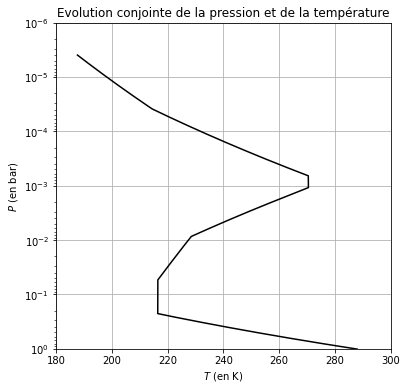

In [ ]:
#@title
plt.figure(figsize = (6,6))
plt.title("Evolution conjointe de la pression et de la température")
# Les lignes qui suivent sont à supprimer pour que les lecteurs puissent expérimenter.
plt.semilogy(T_ISA, P_ISA*1e-5, 'k-')
plt.xlim(180,300), plt.xlabel(r"$T$ (en K)")
plt.ylim(1,1e-6), plt.ylabel(r"$P$ (en bar)")
plt.grid()
plt.show()

In [ ]:
# Cette cellule de code est à vous !

On souhaite maintenant confronter le modèle ISA à un sondage atmosphérique qui donne un état réel de l'atmosphère. Les données représentées ci-après sont fournies par [Météo-France](https://donneespubliques.meteofrance.fr/) et sont issues d'un sondage réalisé par la station météorologique de Nîmes le 21 avril 2021. 

Il est naturel de représenter la pression (univoquement liée à l'altitude) en fonction de la température, puisque ce sont les deux grandeurs mesurées. La courbe  (𝑇,𝑃)  issue du sondage est appelée courbe d'état de l'atmosphère.

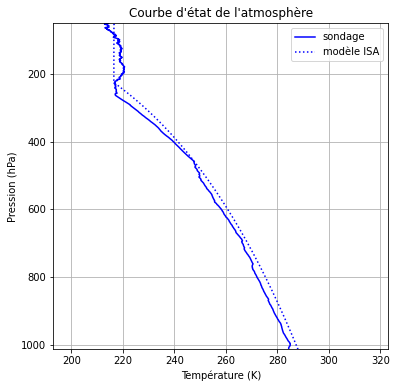

In [ ]:
## Mesures issues d'un sondage atmosphérique
## 21 avril 2021 - Nîmes (c) Météo-France
## https://donneespubliques.meteofrance.fr
###############################################

# Pression et température relevées (resp. en Pa et en K)

P_sondage = np.array([
101080,	100870,	100670,	100470,	100260,	100060,	100000,	99930,	99850,	99780,	99700,	99620,	99570,	99500,	99400,	99280,	99240,	99120,	99010,	98920,	98830,	98700,	98580,	98490,	98350,	98220,	98110,	98010,	97890,	97770,	97640,	97520,	97390,	97290,	97160,	97040,	96940,	96810,	96710,	96620,	96490,	96310,	96170,	96060,	95920,	95780,	95680,	95580,	95470,	95380,	95280,	95160,	95000,	94920,	94810,	94710,	94570,	94490,	94390,	94270,	94140,	94050,	93940,	93880,	93770,	93640,	93560,	93470,	93350,	93240,	93140,	93030,	92910,	92770,	92700,	92590,	92500,	92410,	92310,	92200,	92070,	91970,	91880,	91770,	91650,	91540,	91450,	91350,	91230,	91110,	90980,	90860,	90750,	90640,	90530,	90430,	90310,	90200,	90090,	90000,	89870,	89780,	89690,	89570,	89450,	89320,	89210,	89140,	89040,	88900,	88730,	88640,	88530,	88400,	88280,	88160,	88070,	87970,	87840,	87720,	87600,	87510,	87420,	87320,	87170,	87070,	86980,	86870,	86770,	86660,	86550,	86450,	86340,	86230,	86130,	86010,	85910,	85810,	85690,	85560,	85440,	85300,	85190,	85100,	85000,	84890,	84780,	84690,	84600,	84500,	84420,	84300,	84200,	84110,	83990,	83870,	83770,	83640,	83540,	83470,	83370,	83270,	83130,	83000,	82870,	82760,	82660,	82560,	82470,	82430,	82260,	82150,	82050,	81930,	81820,	81730,	81630,	81510,	81390,	81310,	81200,	81070,	80980,	80870,	80780,	80700,	80600,	80510,	80410,	80310,	80240,	80160,	80000,	79910,	79790,	79690,	79580,	79500,	79410,	79320,	79240,	79120,	79040,	78970,	78860,	78750,	78560,	78460,	78340,	78250,	78160,	78070,	77990,	77920,	77810,	77710,	77600,	77480,	77390,	77290,	77210,	77110,	77020,	76950,	76850,	76740,	76630,	76540,	76450,	76330,	76230,	76130,	76020,	75930,	75830,	75740,	75640,	75540,	75430,	75320,	75230,	75130,	75040,	74960,	74850,	74760,	74670,	74570,	74480,	74380,	74300,	74190,	74100,	74010,	73920,	73820,	73730,	73630,	73540,	73440,	73360,	73280,	73180,	73080,	73000,	72900,	72790,	72690,	72610,	72530,	72410,	72300,	72200,	72100,	72020,	71920,	71820,	71730,	71640,	71540,	71420,	71330,	71240,	71150,	71050,	70960,	70850,	70700,	70550,	70450,	70370,	70290,	70240,	70170,	70100,	70000,	69960,	69890,	69810,	69700,	69600,	69520,	69450,	69340,	69250,	69160,	69080,	68980,	68880,	68770,	68670,	68580,	68480,	68380,	68260,	68150,	68040,	67950,	67840,	67750,	67670,	67550,	67450,	67340,	67270,	67180,	67070,	66980,	66870,	66770,	66660,	66540,	66450,	66370,	66280,	66190,	66080,	65990,	65910,	65840,	65770,	65690,	65610,	65520,	65440,	65380,	65300,	65230,	65170,	65100,	65040,	64950,	64860,	64780,	64690,	64620,	64570,	64490,	64430,	64370,	64310,	64230,	64120,	64040,	63930,	63850,	63800,	63740,	63680,	63610,	63490,	63380,	63280,	63190,	63120,	63070,	63000,	62940,	62880,	62820,	62760,	62680,	62600,	62520,	62460,	62400,	62320,	62240,	62130,	62020,	61920,	61840,	61790,	61710,	61640,	61580,	61520,	61450,	61390,	61330,	61270,	61190,	61120,	61070,	61000,	60930,	60850,	60780,	60720,	60660,	60600,	60540,	60480,	60410,	60350,	60290,	60220,	60130,	60090,	60000,	59930,	59850,	59790,	59700,	59640,	59580,	59510,	59440,	59380,	59310,	59250,	59180,	59110,	59050,	58980,	58920,	58850,	58760,	58700,	58640,	58560,	58480,	58390,	58290,	58220,	58160,	58090,	58030,	57960,	57870,	57790,	57700,	57630,	57590,	57490,	57430,	57360,	57300,	57240,	57170,	57090,	57030,	56960,	56900,	56830,	56770,	56700,	56640,	56570,	56500,	56430,	56360,	56300,	56210,	56130,	56070,	56000,	55920,	55840,	55760,	55700,	55640,	55590,	55530,	55470,	55420,	55360,	55290,	55240,	55180,	55120,	55050,	54990,	54940,	54880,	54820,	54760,	54700,	54620,	54570,	54520,	54460,	54390,	54320,	54260,	54210,	54160,	54110,	54050,	54000,	53940,	53890,	53830,	53760,	53690,	53640,	53590,	53540,	53480,	53430,	53370,	53320,	53270,	53210,	53170,	53120,	53060,	53000,	52950,	52890,	52830,	52780,	52720,	52660,	52600,	52520,	52440,	52360,	52310,	52250,	52190,	52140,	52090,	52040,	51970,	51920,	51860,	51790,	51730,	51670,	51620,	51570,	51510,	51470,	51410,	51360,	51300,	51250,	51190,	51130,	51060,	50980,	50910,	50850,	50800,	50750,	50690,	50630,	50560,	50500,	50450,	50380,	50330,	50270,	50210,	50160,	50100,	50040,	50000,	49920,	49860,	49810,	49760,	49700,	49640,	49580,	49520,	49460,	49410,	49350,	49290,	49240,	49180,	49130,	49080,	49020,	48970,	48910,	48860,	48800,	48750,	48700,	48640,	48580,	48520,	48470,	48420,	48360,	48310,	48260,	48210,	48160,	48110,	48060,	48010,	47960,	47900,	47880,	47800,	47740,	47690,	47630,	47580,	47530,	47470,	47410,	47360,	47310,	47240,	47170,	47110,	47050,	47000,	46950,	46900,	46850,	46790,	46740,	46690,	46640,	46580,	46520,	46460,	46430,	46350,	46300,	46250,	46200,	46150,	46100,	46040,	46000,	45950,	45900,	45850,	45800,	45750,	45700,	45640,	45580,	45520,	45470,	45430,	45370,	45330,	45280,	45230,	45180,	45120,	45070,	45020,	44970,	44920,	44870,	44810,	44760,	44710,	44650,	44600,	44550,	44490,	44440,	44380,	44330,	44270,	44220,	44160,	44110,	44060,	44010,	43960,	43910,	43860,	43810,	43760,	43710,	43670,	43620,	43570,	43530,	43480,	43430,	43380,	43340,	43290,	43240,	43190,	43150,	43100,	43050,	43000,	42950,	42910,	42850,	42800,	42750,	42700,	42660,	42610,	42560,	42510,	42460,	42410,	42370,	42320,	42270,	42220,	42170,	42120,	42070,	42020,	41970,	41920,	41870,	41820,	41780,	41730,	41680,	41630,	41580,	41530,	41480,	41430,	41380,	41320,	41260,	41190,	41140,	41090,	41040,	41000,	40960,	40910,	40870,	40820,	40780,	40730,	40680,	40630,	40580,	40530,	40480,	40440,	40390,	40340,	40290,	40240,	40190,	40140,	40090,	40040,	40000,	39950,	39910,	39860,	39810,	39750,	39710,	39650,	39610,	39560,	39510,	39470,	39420,	39370,	39320,	39270,	39220,	39180,	39130,	39090,	39040,	38990,	38940,	38890,	38840,	38800,	38750,	38700,	38660,	38610,	38560,	38520,	38470,	38430,	38380,	38330,	38290,	38240,	38200,	38150,	38100,	38050,	38010,	37970,	37920,	37870,	37830,	37780,	37740,	37700,	37660,	37620,	37570,	37530,	37480,	37430,	37390,	37340,	37300,	37250,	37210,	37170,	37120,	37080,	37040,	36990,	36950,	36910,	36860,	36810,	36770,	36730,	36690,	36640,	36600,	36550,	36510,	36460,	36410,	36370,	36320,	36280,	36240,	36190,	36150,	36100,	36060,	36020,	35980,	35940,	35890,	35850,	35810,	35760,	35720,	35680,	35640,	35600,	35560,	35510,	35470,	35420,	35380,	35330,	35300,	35250,	35210,	35170,	35130,	35090,	35060,	35010,	34970,	34930,	34890,	34850,	34810,	34760,	34720,	34680,	34640,	34600,	34560,	34510,	34470,	34410,	34370,	34330,	34290,	34260,	34210,	34170,	34140,	34100,	34060,	34020,	33980,	33940,	33900,	33860,	33820,	33770,	33740,	33690,	33650,	33620,	33580,	33540,	33500,	33460,	33420,	33380,	33350,	33310,	33270,	33230,	33190,	33150,	33110,	33070,	33030,	32980,	32940,	32900,	32860,	32820,	32780,	32740,	32700,	32670,	32630,	32580,	32540,	32500,	32470,	32430,	32390,	32350,	32310,	32270,	32240,	32200,	32160,	32120,	32080,	32050,	32000,	31960,	31930,	31880,	31840,	31800,	31760,	31720,	31680,	31650,	31610,	31570,	31530,	31490,	31450,	31410,	31370,	31340,	31300,	31260,	31220,	31180,	31140,	31100,	31060,	31020,	30970,	30930,	30890,	30850,	30810,	30780,	30740,	30700,	30670,	30630,	30590,	30560,	30520,	30480,	30440,	30400,	30360,	30320,	30290,	30250,	30210,	30170,	30130,	30100,	30060,	30030,	30000,	29950,	29910,	29870,	29840,	29800,	29760,	29720,	29690,	29650,	29610,	29580,	29540,	29500,	29460,	29430,	29390,	29360,	29320,	29280,	29250,	29210,	29170,	29130,	29100,	29060,	29030,	28990,	28960,	28920,	28890,	28850,	28810,	28770,	28730,	28700,	28660,	28620,	28580,	28540,	28500,	28460,	28420,	28380,	28340,	28300,	28260,	28220,	28170,	28130,	28090,	28050,	28010,	27970,	27940,	27900,	27860,	27830,	27790,	27750,	27710,	27670,	27640,	27600,	27560,	27520,	27480,	27450,	27410,	27370,	27330,	27290,	27260,	27220,	27180,	27150,	27110,	27070,	27040,	27000,	26970,	26930,	26890,	26850,	26820,	26780,	26750,	26710,	26680,	26640,	26600,	26560,	26530,	26490,	26450,	26410,	26380,	26340,	26310,	26270,	26230,	26190,	26150,	26120,	26080,	26040,	26000,	25970,	25930,	25890,	25860,	25820,	25790,	25750,	25720,	25680,	25640,	25600,	25570,	25530,	25490,	25460,	25430,	25390,	25360,	25320,	25290,	25260,	25230,	25190,	25150,	25120,	25080,	25050,	25000,	24980,	24950,	24910,	24880,	24850,	24810,	24780,	24750,	24710,	24680,	24650,	24610,	24580,	24540,	24510,	24480,	24450,	24410,	24380,	24340,	24310,	24280,	24250,	24220,	24190,	24160,	24120,	24090,	24060,	24030,	24000,	23970,	23940,	23910,	23880,	23850,	23820,	23790,	23760,	23730,	23700,	23670,	23640,	23620,	23590,	23560,	23530,	23500,	23470,	23440,	23410,	23380,	23350,	23320,	23290,	23260,	23240,	23210,	23180,	23150,	23110,	23090,	23060,	23040,	23010,	22980,	22950,	22920,	22890,	22860,	22830,	22800,	22770,	22740,	22720,	22690,	22660,	22640,	22610,	22580,	22550,	22530,	22500,	22470,	22440,	22410,	22380,	22360,	22330,	22300,	22270,	22240,	22210,	22190,	22160,	22140,	22120,	22080,	22050,	22020,	21990,	21970,	21940,	21910,	21880,	21850,	21820,	21790,	21760,	21730,	21700,	21670,	21650,	21620,	21590,	21560,	21530,	21500,	21480,	21450,	21430,	21400,	21370,	21340,	21310,	21280,	21250,	21220,	21190,	21160,	21130,	21110,	21080,	21050,	21020,	20990,	20960,	20930,	20900,	20870,	20850,	20820,	20790,	20770,	20730,	20710,	20680,	20650,	20620,	20590,	20570,	20540,	20510,	20480,	20460,	20430,	20400,	20370,	20350,	20320,	20290,	20270,	20240,	20210,	20180,	20160,	20130,	20100,	20080,	20050,	20020,	20000,	19970,	19950,	19920,	19890,	19870,	19840,	19810,	19790,	19760,	19730,	19700,	19680,	19650,	19630,	19600,	19580,	19550,	19520,	19500,	19470,	19440,	19410,	19380,	19350,	19330,	19310,	19280,	19260,	19230,	19200,	19180,	19160,	19130,	19100,	19080,	19050,	19030,	19000,	18990,	18950,	18930,	18900,	18880,	18850,	18830,	18800,	18770,	18750,	18720,	18690,	18670,	18640,	18620,	18590,	18570,	18550,	18520,	18500,	18470,	18450,	18420,	18400,	18370,	18350,	18330,	18300,	18280,	18250,	18230,	18210,	18180,	18160,	18130,	18110,	18080,	18060,	18030,	18010,	17990,	17960,	17940,	17910,	17890,	17860,	17840,	17810,	17790,	17760,	17740,	17720,	17690,	17670,	17650,	17620,	17600,	17570,	17550,	17530,	17500,	17480,	17450,	17430,	17410,	17380,	17350,	17330,	17300,	17280,	17260,	17230,	17210,	17190,	17160,	17140,	17110,	17090,	17070,	17040,	17020,	16990,	16970,	16950,	16930,	16900,	16880,	16850,	16830,	16810,	16780,	16760,	16740,	16710,	16690,	16660,	16640,	16610,	16590,	16570,	16540,	16520,	16500,	16470,	16450,	16430,	16400,	16380,	16360,	16330,	16310,	16290,	16260,	16240,	16220,	16190,	16170,	16140,	16120,	16100,	16080,	16060,	16030,	16010,	15990,	15970,	15950,	15920,	15900,	15880,	15860,	15830,	15810,	15790,	15770,	15750,	15720,	15700,	15680,	15660,	15630,	15610,	15590,	15570,	15550,	15530,	15500,	15480,	15460,	15440,	15420,	15400,	15370,	15350,	15330,	15310,	15290,	15260,	15240,	15220,	15200,	15180,	15160,	15140,	15120,	15100,	15080,	15050,	15030,	15010,	15000,	14970,	14950,	14930,	14910,	14890,	14870,	14850,	14820,	14800,	14780,	14760,	14740,	14720,	14700,	14680,	14660,	14640,	14620,	14600,	14580,	14560,	14540,	14520,	14500,	14480,	14460,	14440,	14420,	14400,	14370,	14360,	14340,	14320,	14300,	14280,	14260,	14240,	14220,	14200,	14180,	14160,	14140,	14120,	14110,	14090,	14070,	14050,	14030,	14010,	13990,	13970,	13950,	13930,	13910,	13890,	13870,	13850,	13830,	13810,	13790,	13770,	13760,	13740,	13720,	13700,	13680,	13660,	13640,	13620,	13600,	13580,	13560,	13550,	13520,	13500,	13490,	13470,	13450,	13430,	13410,	13390,	13370,	13350,	13330,	13310,	13290,	13270,	13250,	13230,	13210,	13190,	13170,	13150,	13140,	13120,	13100,	13080,	13060,	13040,	13020,	13000,	12980,	12960,	12950,	12930,	12910,	12890,	12870,	12850,	12830,	12810,	12800,	12780,	12760,	12740,	12720,	12710,	12690,	12670,	12650,	12630,	12620,	12600,	12580,	12560,	12540,	12520,	12510,	12490,	12470,	12450,	12440,	12420,	12400,	12390,	12370,	12350,	12330,	12310,	12300,	12280,	12260,	12250,	12230,	12210,	12200,	12180,	12160,	12150,	12130,	12110,	12090,	12080,	12060,	12040,	12020,	12000,	11980,	11970,	11950,	11940,	11920,	11900,	11890,	11870,	11850,	11830,	11820,	11800,	11790,	11770,	11750,	11740,	11720,	11700,	11690,	11670,	11650,	11640,	11620,	11610,	11590,	11570,	11560,	11540,	11520,	11510,	11490,	11480,	11460,	11450,	11430,	11410,	11400,	11380,	11370,	11350,	11330,	11320,	11300,	11280,	11260,	11240,	11220,	11190,	11170,	11160,	11140,	11120,	11090,	11070,	11040,	11040,	11020,	11000,	10990,	10970,	10960,	10940,	10920,	10910,	10890,	10880,	10860,	10840,	10830,	10810,	10800,	10780,	10760,	10750,	10730,	10720,	10700,	10680,	10670,	10650,	10640,	10620,	10610,	10590,	10570,	10560,	10540,	10530,	10510,	10490,	10480,	10460,	10450,	10440,	10420,	10410,	10390,	10380,	10360,	10350,	10330,	10320,	10310,	10290,	10280,	10260,	10250,	10230,	10220,	10210,	10190,	10180,	10160,	10150,	10140,	10120,	10110,	10090,	10080,	10070,	10050,	10040,	10020,	10010,	10000,	9980,	9970,	9960,	9940,	9930,	9910,	9900,	9890,	9870,	9860,	9850,	9830,	9820,	9800,	9790,	9770,	9760,	9750,	9730,	9720,	9710,	9690,	9680,	9660,	9650,	9640,	9620,	9610,	9590,	9580,	9560,	9550,	9540,	9520,	9510,	9500,	9480,	9470,	9450,	9440,	9430,	9410,	9400,	9380,	9370,	9360,	9340,	9330,	9310,	9300,	9280,	9270,	9260,	9240,	9230,	9210,	9200,	9190,	9170,	9160,	9150,	9130,	9120,	9100,	9090,	9080,	9070,	9050,	9040,	9030,	9010,	9000,	8990,	8970,	8960,	8950,	8940,	8920,	8910,	8900,	8890,	8870,	8860,	8850,	8830,	8820,	8810,	8800,	8780,	8770,	8760,	8740,	8730,	8720,	8710,	8700,	8680,	8670,	8660,	8640,	8630,	8620,	8610,	8590,	8580,	8570,	8560,	8550,	8530,	8520,	8510,	8500,	8480,	8470,	8460,	8450,	8440,	8420,	8410,	8400,	8390,	8370,	8360,	8350,	8340,	8320,	8310,	8300,	8290,	8280,	8260,	8250,	8240,	8230,	8210,	8200,	8190,	8180,	8170,	8150,	8140,	8130,	8120,	8100,	8090,	8080,	8070,	8050,	8040,	8030,	8020,	8000,	7990,	7980,	7970,	7960,	7940,	7930,	7920,	7910,	7900,	7890,	7870,	7860,	7850,	7840,	7820,	7810,	7800,	7790,	7770,	7760,	7750,	7740,	7720,	7710,	7700,	7690,	7680,	7660,	7650,	7640,	7630,	7610,	7600,	7590,	7580,	7570,	7550,	7540,	7530,	7520,	7510,	7500,	7490,	7470,	7460,	7450,	7440,	7430,	7410,	7400,	7390,	7380,	7370,	7360,	7340,	7330,	7320,	7310,	7300,	7290,	7280,	7260,	7250,	7240,	7230,	7220,	7210,	7200,	7190,	7180,	7160,	7150,	7140,	7130,	7120,	7110,	7100,	7090,	7080,	7070,	7060,	7040,	7030,	7020,	7010,	7000,	6990,	6980,	6970,	6960,	6940,	6930,	6920,	6910,	6900,	6890,	6880,	6870,	6860,	6850,	6840,	6830,	6820,	6810,	6800,	6790,	6780,	6770,	6760,	6750,	6740,	6730,	6720,	6710,	6700,	6690,	6680,	6670,	6660,	6650,	6640,	6630,	6620,	6610,	6600,	6590,	6580,	6570,	6560,	6550,	6540,	6530,	6520,	6510,	6500,	6490,	6480,	6470,	6460,	6450,	6440,	6430,	6420,	6410,	6400,	6390,	6380,	6370,	6360,	6350,	6340,	6330,	6320,	6310,	6300,	6290,	6280,	6270,	6270,	6260,	6250,	6240,	6230,	6220,	6210,	6200,	6190,	6180,	6170,	6160,	6150,	6140,	6130,	6130,	6120,	6110,	6100,	6090,	6080,	6070,	6060,	6050,	6040,	6030,	6020,	6020,	6010,	6000,	5990,	5980,	5970,	5960,	5950,	5940,	5930,	5920,	5910,	5900,	5900,	5890,	5880,	5870,	5860,	5850,	5840,	5830,	5820,	5810,	5800,	5790,	5790,	5780,	5770,	5760,	5750,	5740,	5730,	5720,	5710,	5700,	5700,	5690,	5680,	5670,	5660,	5650,	5640,	5630,	5620,	5610,	5600,	5590,	5580,	5580,	5570,	5560,	5550,	5540,	5530,	5520,	5510,	5500,	5490,	5480,	5470,	5460,	5450,	5450,	5440,	5430,	5420,	5410,	5400,	5390,	5380,	5370,	5360,	5350,	5340,	5330,	5320,	5310,	5300,	5290,	5280,	5280,	5270,	5260,	5250,	5240,	5230,	5220,	5210,	5200,	5190,	5180,	5170,	5160,	5150,	5140,	5130,	5120,	5110,	5110,	5100,	5090,	5080,	5070,	5060,	5050,	5040,	5040,	5030,	5020,	5010,	5000,	4990,	4980,	4970,	4960,	4950,	4950,	4940,	4930,	4920,	4910,	4900,	4890,	4890,	4880,	4870,	4860,	4850,	4840,	4830,	4830,	4820,	4810,	4800,	4790,	4780,	4780,	4770,	4760,	4750,	4740,	4740,	4730,	4720,	4710,	4700,	4700,	4690,	4680,	4670,	4660,	4660,	4650,	4640,	4630,	4630,	4620,	4610,	4600,	4600,	4590,	4580,	4580,	4570,	4560,	4550,	4540,	4540,	4530,	4520,	4520,	4510,	4500,	4500,	4490,	4480,	4470,	4470,	4460,	4450,	4450,	4440,	4430,	4430,	4420,	4410,	4410,	4400,	4390,	4390,	4380,	4370,	4370,	4360,	4350,	4350,	4340,	4330,	4320,	4320,	4310,	4300,	4300,	4290,	4280,	4270,	4270,	4260,	4250,	4240,	4230,	4230,	4220,	4210,	4210,	4200,	4190,	4180,	4180,	4170,	4160,	4150,	4150,	4140,	4130,	4130,	4120,	4110,	4100,	4100,	4090,	4080,	4080,	4070,	4060,	4050,	4050,	4040,	4030,	4030,	4020,	4010,	4010,	4000,	3990,	3980,	3980,	3970,	3960,	3960,	3950,	3940,	3940,	3930,	3920,	3910,	3910,	3900,	3890,	3890,	3880,	3870,	3870,	3860,	3850,	3850,	3840,	3830,	3830,	3820,	3820,	3810,	3800,	3790,	3790,	3780,	3770,	3770,	3760,	3750,	3750,	3740,	3730,	3730,	3720,	3710,	3710,	3700,	3690,	3690,	3680,	3670,	3670,	3660,	3650,	3650,	3640,	3640,	3630,	3620,	3620,	3610,	3600,	3600,	3590,	3590,	3580,	3570,	3570,	3560,	3550,	3550,	3540,	3530,	3530,	3520,	3510,	3510,	3500,	3490,	3490,	3480,	3470,	3470,	3460,	3450,	3450,	3440,	3440,	3430,	3420,	3420,	3410,	3410,	3400,	3390,	3390,	3380,	3370,	3370,	3360,	3360,	3350,	3350,	3340,	3330,	3330,	3320,	3320,	3310,	3300,	3300,	3290,	3290,	3280,	3280,	3270,	3260,	3260,	3250,	3250,	3240,	3240,	3230,	3230,	3220,	3220,	3210,	3200,	3200,	3190,	3190,	3180,	3180,	3170,	3170,	3160,	3160,	3150,	3150,	3140,	3140,	3130,	3130,	3120,	3120,	3110,	3110,	3100,	3090,	3090,	3090,	3080,	3080,	3070,	3070,	3060,	3060,	3050,	3050,	3040,	3030,	3030,	3020,	3020,	3010,	3010,	3000,	3000,	3000,	2990,	2990,	2980,	2980,	2970,	2970,	2960,	2960,	2950,	2950,	2940,	2940,	2930,	2930,	2920,	2920,	2910,	2910,	2900,	2900,	2890,	2890,	2880,	2880,	2870,	2870,	2870,	2860,	2860,	2850,	2850,	2840,	2840,	2830,	2830,	2820,	2820,	2820,	2810,	2810,	2800,	2800,	2790,	2790,	2780,	2780,	2770,	2770,	2770,	2760,	2760,	2750,	2750,	2740,	2740,	2730,	2730,	2720,	2720,	2720,	2710,	2710,	2700,	2700,	2690,	2690,	2680,	2680,	2680,	2670,	2670,	2660,	2660,	2650,	2650,	2650,	2640,	2640,	2630,	2630,	2620,	2620,	2620,	2610,	2610,	2600,	2600,	2590,	2590,	2580,	2580,	2570,	2570,	2570,	2560,	2560,	2550,	2550,	2540,	2540,	2540,	2530,	2530,	2520,	2520,	2510,	2510,	2500,	2500,	2490,	2490,	2480,	2480,	2480,	2470,	2470,	2460,	2460,	2450,	2450,	2440,	2440,	2430,	2430,	2430,	2420,	2420,	2410,	2410,	2400,	2400,	2390,	2390,	2380,	2380,	2370,	2370,	2370,	2360,	2360,	2350,	2350,	2340,	2340,	2330,	2330,	2330,	2320,	2320,	2310,	2310,	2300,	2300,	2290,	2290,	2290,	2280,	2280,	2270,	2270,	2260,	2260,	2260,	2250,	2250,	2240,	2240,	2230,	2230,	2230,	2220,	2220,	2210,	2210,	2210,	2200,	2200,	2200,	2190,	2190,	2190,	2180,	2180,	2180,	2170,	2170,	2170,	2160,	2160,	2160,	2150,	2150,	2140,	2140,	2140,	2130,	2130,	2130,	2120,	2120,	2120,	2110,	2110,	2110,	2100,	2100,	2090,	2090,	2090,	2090,	2080,	2080,	2080,	2070,	2070,	2070,	2060,	2060,	2060,	2050,	2050,	2050,	2040,	2040,	2030,	2030,	2030,	2030,	2020,	2020,	2010,	2010,	2010,	2000,	2000,	2000,	2000,	1990,	1990,	1990,	1980,	1980,	1970,	1970,	1970,	1960,	1960,	1960,	1950,	1950,	1950,	1940,	1940,	1940,	1930,	1930,	1930,	1920,	1920,	1920,	1910,	1910,	1910,	1900,	1900,	1900,	1890,	1890,	1890,	1880,	1880,	1880,	1870,	1870,	1870,	1860,	1860,	1860,	1850,	1850,	1850,	1840,	1840,	1840,	1830,	1830,	1830,	1820,	1820,	1820,	1810,	1810,	1810,	1800,	1800,	1800,	1800,	1790,	1790,	1790,	1780,	1780,	1780,	1770,	1770,	1770,	1760,	1760,	1760,	1760,	1750,	1750,	1750,	1740,	1740,	1740,	1740,	1730,	1730,	1730,	1720,	1720,	1720,	1720,	1710,	1710,	1710,	1700,	1700,	1700,	1700,	1690,	1690,	1690,	1680,	1680,	1680,	1680,	1670,	1670,	1670,	1670,	1660,	1660,	1660,	1650,	1650,	1650,	1640,	1640,	1640,	1640,	1630,	1630,	1630,	1620,	1620,	1620,	1610,	1610,	1610,	1610,	1600,	1600,	1600,	1590,	1590,	1590,	1590,	1580,	1580,	1580,	1570,	1570,	1570,	1560,	1560,	1560,	1560,	1550,	1550,	1550,	1540,	1540,	1540,	1530,	1530,	1530,	1530,	1520,	1520,	1520,	1520,	1510,	1510,	1510,	1500,	1500,	1500,	1500,	1490,	1490,	1490,	1490,	1480,	1480,	1480,	1480,	1470,	1470,	1470,	1470,	1460,	1460,	1460,	1460,	1450,	1450,	1450,	1450,	1440,	1440,	1440,	1440,	1430,	1430,	1430,	1430,	1420,	1420,	1420,	1420,	1410,	1410,	1410,	1410,	1400,	1400,	1400,	1400,	1390,	1390,	1390,	1390,	1390,	1380,	1380,	1380,	1380,	1370,	1370,	1370,	1370,	1360,	1360,	1360,	1360,	1350,	1350,	1350,	1350,	1340,	1340,	1340,	1340,	1340,	1330,	1330,	1330,	1330,	1320,	1320,	1320,	1320,	1310,	1310,	1310,	1310,	1300,	1300,	1300,	1300,	1300,	1290,	1290,	1290,	1290,	1280,	1280,	1280,	1280,	1270,	1270,	1270,	1270,	1270,	1260,	1260,	1260,	1260,	1250,	1250,	1250,	1250,	1240,	1240,	1240,	1240,	1240,	1230,	1230,	1230,	1230,	1220,	1220,	1220,	1220,	1220,	1210,	1210])

T_sondage = np.array([
284.400000,	284.400000,	284.540000,	284.660000,	284.930000,	285.000000,	285.000000,	284.950000,	285.000000,	285.000000,	284.950000,	284.900000,	284.950000,	284.900000,	284.810000,	284.730000,	284.660000,	284.570000,	284.440000,	284.320000,	284.200000,	284.110000,	284.040000,	283.940000,	283.870000,	283.770000,	283.680000,	283.580000,	283.460000,	283.370000,	283.270000,	283.180000,	283.100000,	283.030000,	282.940000,	282.870000,	282.770000,	282.650000,	282.540000,	282.450000,	282.350000,	282.260000,	282.190000,	282.140000,	282.090000,	282.040000,	282.000000,	281.950000,	281.900000,	281.860000,	281.830000,	281.760000,	281.740000,	281.740000,	281.690000,	281.670000,	281.620000,	281.620000,	281.550000,	281.530000,	281.480000,	281.410000,	281.410000,	281.360000,	281.290000,	281.250000,	281.180000,	281.060000,	280.990000,	280.830000,	280.730000,	280.660000,	280.570000,	280.500000,	280.430000,	280.340000,	280.220000,	280.130000,	280.080000,	279.990000,	279.940000,	279.850000,	279.760000,	279.690000,	279.600000,	279.510000,	279.440000,	279.320000,	279.230000,	279.140000,	279.070000,	278.980000,	278.910000,	278.820000,	278.770000,	278.700000,	278.660000,	278.590000,	278.520000,	278.450000,	278.410000,	278.390000,	278.340000,	278.250000,	278.200000,	278.160000,	278.070000,	277.950000,	277.880000,	277.770000,	277.680000,	277.570000,	277.500000,	277.480000,	277.410000,	277.250000,	277.120000,	277.050000,	277.020000,	276.960000,	276.840000,	276.800000,	276.780000,	276.710000,	276.640000,	276.600000,	276.460000,	276.440000,	276.500000,	276.530000,	276.570000,	276.530000,	276.440000,	276.320000,	276.260000,	276.140000,	276.030000,	275.900000,	275.780000,	275.690000,	275.630000,	275.540000,	275.430000,	275.360000,	275.310000,	275.250000,	275.130000,	275.110000,	275.040000,	274.980000,	274.910000,	274.790000,	274.700000,	274.660000,	274.640000,	274.570000,	274.530000,	274.460000,	274.390000,	274.350000,	274.260000,	274.140000,	274.080000,	273.990000,	273.900000,	273.900000,	273.850000,	273.790000,	273.740000,	273.650000,	273.610000,	273.540000,	273.500000,	273.470000,	273.450000,	273.360000,	273.300000,	273.250000,	273.180000,	273.120000,	273.030000,	272.960000,	272.890000,	272.810000,	272.740000,	272.650000,	272.560000,	272.490000,	272.410000,	272.320000,	272.230000,	272.160000,	272.050000,	272.050000,	271.980000,	271.920000,	271.890000,	271.800000,	271.740000,	271.670000,	271.600000,	271.520000,	271.430000,	271.360000,	271.290000,	271.230000,	271.180000,	271.140000,	271.070000,	271.010000,	270.920000,	270.830000,	270.740000,	270.650000,	270.540000,	270.450000,	270.470000,	270.430000,	270.360000,	270.290000,	270.250000,	270.320000,	270.290000,	270.250000,	270.230000,	270.180000,	270.230000,	270.290000,	270.340000,	270.360000,	270.430000,	270.540000,	270.520000,	270.430000,	270.360000,	270.270000,	270.210000,	270.180000,	270.120000,	270.050000,	270.010000,	269.940000,	269.850000,	269.810000,	269.700000,	269.670000,	269.650000,	269.610000,	269.560000,	269.500000,	269.380000,	269.300000,	269.210000,	269.130000,	269.010000,	268.940000,	268.870000,	268.760000,	268.720000,	268.610000,	268.520000,	268.430000,	268.360000,	268.250000,	268.140000,	268.100000,	267.990000,	267.900000,	267.790000,	267.740000,	267.640000,	267.530000,	267.440000,	267.370000,	267.280000,	267.210000,	267.210000,	267.120000,	267.100000,	267.120000,	267.210000,	267.260000,	267.190000,	267.150000,	267.080000,	266.970000,	266.920000,	266.830000,	266.810000,	266.790000,	266.760000,	266.700000,	266.630000,	266.580000,	266.510000,	266.400000,	266.330000,	266.330000,	266.310000,	266.220000,	266.200000,	266.220000,	266.150000,	266.320000,	266.450000,	266.380000,	266.290000,	266.220000,	266.170000,	266.150000,	266.040000,	265.860000,	265.770000,	265.650000,	265.560000,	265.430000,	265.330000,	265.240000,	265.110000,	264.970000,	264.900000,	264.770000,	264.670000,	264.560000,	264.470000,	264.330000,	264.220000,	264.080000,	263.990000,	263.920000,	263.870000,	263.830000,	263.870000,	263.810000,	263.710000,	263.620000,	263.580000,	263.510000,	263.410000,	263.320000,	263.230000,	263.160000,	263.090000,	263.050000,	262.980000,	262.930000,	262.860000,	262.790000,	262.700000,	262.630000,	262.560000,	262.560000,	262.520000,	262.470000,	262.380000,	262.330000,	262.260000,	262.190000,	262.120000,	262.050000,	261.960000,	261.890000,	261.820000,	261.800000,	261.730000,	261.680000,	261.610000,	261.540000,	261.470000,	261.380000,	261.330000,	261.280000,	261.240000,	261.160000,	261.090000,	261.050000,	260.980000,	260.910000,	260.840000,	260.770000,	260.700000,	260.620000,	260.550000,	260.460000,	260.390000,	260.270000,	260.130000,	260.030000,	259.960000,	259.890000,	259.800000,	259.750000,	259.680000,	259.630000,	259.530000,	259.460000,	259.390000,	259.320000,	259.290000,	259.240000,	259.170000,	259.170000,	259.120000,	259.100000,	259.080000,	259.050000,	259.000000,	258.950000,	258.860000,	258.790000,	258.740000,	258.660000,	258.620000,	258.620000,	258.570000,	258.490000,	258.470000,	258.420000,	258.350000,	258.270000,	258.200000,	258.130000,	258.050000,	257.980000,	257.880000,	257.810000,	257.740000,	257.690000,	257.590000,	257.510000,	257.460000,	257.390000,	257.340000,	257.240000,	257.170000,	257.070000,	256.970000,	256.900000,	256.820000,	256.670000,	256.550000,	256.500000,	256.400000,	256.350000,	256.220000,	256.150000,	256.050000,	255.950000,	255.840000,	255.670000,	255.630000,	255.670000,	255.630000,	255.610000,	255.560000,	255.610000,	255.610000,	255.540000,	255.500000,	255.430000,	255.370000,	255.300000,	255.260000,	255.210000,	255.170000,	255.130000,	255.060000,	255.040000,	254.990000,	254.970000,	254.950000,	254.880000,	254.840000,	254.840000,	254.800000,	254.750000,	254.690000,	254.640000,	254.620000,	254.620000,	254.600000,	254.560000,	254.490000,	254.430000,	254.430000,	254.380000,	254.340000,	254.270000,	254.210000,	254.140000,	254.080000,	254.010000,	253.930000,	253.860000,	253.800000,	253.730000,	253.690000,	253.600000,	253.540000,	253.450000,	253.360000,	253.310000,	253.250000,	253.210000,	253.140000,	253.050000,	252.990000,	252.920000,	252.860000,	252.790000,	252.700000,	252.620000,	252.570000,	252.510000,	252.530000,	252.510000,	252.490000,	252.420000,	252.400000,	252.360000,	252.290000,	252.250000,	252.180000,	252.140000,	252.050000,	251.990000,	251.940000,	251.900000,	251.860000,	251.840000,	251.790000,	251.710000,	251.710000,	251.660000,	251.580000,	251.530000,	251.470000,	251.420000,	251.380000,	251.360000,	251.290000,	251.230000,	251.160000,	251.120000,	251.010000,	250.930000,	250.860000,	250.770000,	250.710000,	250.640000,	250.580000,	250.490000,	250.430000,	250.360000,	250.320000,	250.320000,	250.300000,	250.340000,	250.360000,	250.320000,	250.250000,	250.210000,	250.170000,	250.080000,	249.970000,	249.890000,	249.800000,	249.740000,	249.690000,	249.610000,	249.560000,	249.560000,	249.650000,	249.760000,	249.840000,	249.870000,	249.840000,	249.800000,	249.820000,	249.820000,	249.800000,	249.760000,	249.690000,	249.610000,	249.560000,	249.630000,	249.760000,	249.780000,	249.780000,	249.780000,	249.780000,	249.740000,	249.670000,	249.650000,	249.580000,	249.520000,	249.430000,	249.370000,	249.300000,	249.190000,	249.130000,	249.040000,	249.000000,	248.910000,	248.870000,	248.850000,	248.850000,	248.850000,	248.870000,	248.850000,	248.830000,	248.780000,	248.720000,	248.670000,	248.630000,	248.540000,	248.450000,	248.390000,	248.320000,	248.260000,	248.150000,	248.080000,	248.040000,	248.020000,	248.110000,	248.210000,	248.170000,	248.130000,	248.110000,	248.170000,	248.190000,	248.190000,	248.150000,	248.190000,	248.150000,	248.110000,	248.080000,	248.040000,	247.950000,	247.870000,	247.820000,	247.760000,	247.710000,	247.730000,	247.710000,	247.670000,	247.670000,	247.690000,	247.730000,	247.710000,	247.690000,	247.630000,	247.600000,	247.540000,	247.520000,	247.490000,	247.450000,	247.430000,	247.390000,	247.320000,	247.230000,	247.170000,	247.080000,	247.010000,	246.930000,	246.860000,	246.790000,	246.710000,	246.640000,	246.550000,	246.470000,	246.400000,	246.310000,	246.220000,	246.110000,	246.050000,	245.960000,	245.890000,	245.810000,	245.720000,	245.610000,	245.540000,	245.450000,	245.390000,	245.300000,	245.210000,	245.140000,	245.100000,	245.010000,	244.950000,	244.860000,	244.790000,	244.730000,	244.660000,	244.570000,	244.500000,	244.480000,	244.390000,	244.350000,	244.260000,	244.190000,	244.120000,	244.050000,	244.010000,	243.940000,	243.900000,	243.810000,	243.740000,	243.670000,	243.610000,	243.520000,	243.450000,	243.400000,	243.310000,	243.270000,	243.200000,	243.130000,	243.090000,	243.000000,	242.950000,	242.930000,	242.840000,	242.770000,	242.700000,	242.640000,	242.570000,	242.500000,	242.410000,	242.340000,	242.290000,	242.270000,	242.200000,	242.130000,	242.090000,	242.020000,	241.950000,	241.910000,	241.840000,	241.770000,	241.700000,	241.630000,	241.560000,	241.450000,	241.380000,	241.290000,	241.200000,	241.150000,	241.100000,	241.030000,	240.960000,	240.900000,	240.830000,	240.760000,	240.690000,	240.590000,	240.520000,	240.480000,	240.450000,	240.380000,	240.340000,	240.310000,	240.240000,	240.220000,	240.130000,	240.060000,	240.010000,	239.960000,	239.940000,	239.870000,	239.800000,	239.700000,	239.650000,	239.560000,	239.490000,	239.440000,	239.420000,	239.350000,	239.280000,	239.200000,	239.130000,	239.060000,	238.970000,	238.890000,	238.800000,	238.730000,	238.650000,	238.610000,	238.490000,	238.440000,	238.340000,	238.270000,	238.220000,	238.150000,	238.080000,	238.000000,	237.910000,	237.830000,	237.760000,	237.690000,	237.590000,	237.540000,	237.440000,	237.370000,	237.300000,	237.200000,	237.130000,	237.030000,	236.950000,	236.880000,	236.810000,	236.730000,	236.660000,	236.580000,	236.500000,	236.400000,	236.330000,	236.250000,	236.180000,	236.130000,	236.030000,	235.950000,	235.880000,	235.850000,	235.750000,	235.700000,	235.600000,	235.550000,	235.450000,	235.400000,	235.340000,	235.320000,	235.290000,	235.240000,	235.190000,	235.110000,	235.060000,	234.990000,	234.880000,	234.860000,	234.780000,	234.730000,	234.690000,	234.680000,	234.630000,	234.570000,	234.500000,	234.440000,	234.390000,	234.310000,	234.290000,	234.240000,	234.180000,	234.140000,	234.140000,	234.060000,	234.030000,	234.010000,	233.970000,	233.930000,	233.850000,	233.770000,	233.740000,	233.690000,	233.630000,	233.580000,	233.500000,	233.420000,	233.420000,	233.340000,	233.230000,	233.180000,	233.130000,	233.100000,	233.040000,	232.990000,	232.910000,	232.860000,	232.800000,	232.770000,	232.710000,	232.640000,	232.560000,	232.470000,	232.420000,	232.310000,	232.260000,	232.170000,	232.120000,	232.030000,	231.980000,	231.900000,	231.840000,	231.760000,	231.700000,	231.620000,	231.560000,	231.480000,	231.390000,	231.310000,	231.250000,	231.170000,	231.080000,	231.000000,	230.970000,	230.890000,	230.800000,	230.740000,	230.690000,	230.630000,	230.600000,	230.510000,	230.460000,	230.400000,	230.310000,	230.260000,	230.200000,	230.140000,	230.050000,	229.990000,	229.910000,	229.850000,	229.790000,	229.730000,	229.670000,	229.610000,	229.560000,	229.470000,	229.380000,	229.320000,	229.260000,	229.140000,	229.080000,	228.990000,	228.930000,	228.840000,	228.810000,	228.720000,	228.690000,	228.600000,	228.570000,	228.510000,	228.420000,	228.360000,	228.330000,	228.270000,	228.170000,	228.110000,	228.020000,	227.960000,	227.900000,	227.810000,	227.740000,	227.650000,	227.620000,	227.490000,	227.460000,	227.400000,	227.340000,	227.270000,	227.210000,	227.180000,	227.120000,	227.050000,	227.020000,	226.930000,	226.860000,	226.770000,	226.740000,	226.670000,	226.580000,	226.510000,	226.450000,	226.410000,	226.350000,	226.280000,	226.220000,	226.180000,	226.150000,	226.120000,	226.020000,	225.990000,	225.920000,	225.890000,	225.800000,	225.720000,	225.650000,	225.620000,	225.510000,	225.460000,	225.360000,	225.300000,	225.210000,	225.140000,	225.090000,	225.000000,	224.930000,	224.860000,	224.780000,	224.730000,	224.660000,	224.590000,	224.520000,	224.450000,	224.390000,	224.340000,	224.270000,	224.230000,	224.160000,	224.100000,	224.030000,	223.960000,	223.890000,	223.830000,	223.760000,	223.670000,	223.590000,	223.540000,	223.520000,	223.480000,	223.390000,	223.340000,	223.300000,	223.260000,	223.210000,	223.170000,	223.100000,	223.020000,	222.950000,	222.950000,	222.870000,	222.870000,	222.840000,	222.820000,	222.800000,	222.720000,	222.650000,	222.590000,	222.520000,	222.460000,	222.370000,	222.310000,	222.230000,	222.160000,	222.100000,	222.010000,	221.910000,	221.820000,	221.740000,	221.660000,	221.570000,	221.490000,	221.390000,	221.300000,	221.220000,	221.120000,	221.040000,	220.930000,	220.850000,	220.770000,	220.670000,	220.610000,	220.500000,	220.400000,	220.360000,	220.260000,	220.180000,	220.080000,	219.980000,	219.940000,	219.860000,	219.780000,	219.700000,	219.620000,	219.560000,	219.480000,	219.400000,	219.320000,	219.240000,	219.180000,	219.080000,	219.000000,	218.940000,	218.860000,	218.800000,	218.700000,	218.640000,	218.580000,	218.500000,	218.440000,	218.350000,	218.290000,	218.210000,	218.130000,	218.070000,	217.990000,	217.920000,	217.840000,	217.760000,	217.680000,	217.610000,	217.530000,	217.450000,	217.390000,	217.340000,	217.260000,	217.200000,	217.160000,	217.140000,	217.120000,	217.090000,	217.070000,	217.030000,	217.030000,	217.050000,	217.050000,	217.050000,	217.030000,	217.010000,	217.030000,	217.090000,	217.260000,	217.410000,	217.530000,	217.680000,	217.740000,	217.720000,	217.740000,	217.680000,	217.630000,	217.530000,	217.470000,	217.430000,	217.410000,	217.410000,	217.370000,	217.360000,	217.410000,	217.470000,	217.490000,	217.490000,	217.490000,	217.510000,	217.510000,	217.490000,	217.430000,	217.410000,	217.370000,	217.390000,	217.430000,	217.450000,	217.450000,	217.410000,	217.430000,	217.490000,	217.490000,	217.450000,	217.430000,	217.450000,	217.450000,	217.370000,	217.320000,	217.240000,	217.200000,	217.220000,	217.200000,	217.140000,	217.110000,	217.030000,	216.970000,	216.900000,	216.900000,	216.840000,	216.900000,	216.950000,	216.970000,	217.050000,	217.070000,	217.140000,	217.260000,	217.320000,	217.300000,	217.260000,	217.220000,	217.180000,	217.120000,	217.090000,	217.050000,	217.030000,	217.050000,	217.030000,	217.010000,	217.070000,	217.160000,	217.220000,	217.200000,	217.180000,	217.180000,	217.140000,	217.140000,	217.120000,	217.090000,	217.070000,	217.160000,	217.220000,	217.200000,	217.140000,	217.110000,	217.050000,	216.990000,	216.930000,	216.880000,	216.820000,	216.760000,	216.700000,	216.650000,	216.610000,	216.590000,	216.610000,	216.650000,	216.670000,	216.720000,	216.780000,	216.880000,	216.950000,	216.950000,	216.930000,	216.910000,	216.900000,	216.860000,	216.800000,	216.780000,	216.840000,	216.930000,	216.990000,	216.990000,	217.030000,	217.090000,	217.090000,	217.110000,	217.120000,	217.120000,	217.240000,	217.410000,	217.590000,	217.680000,	217.720000,	217.780000,	217.880000,	217.960000,	217.960000,	217.940000,	217.880000,	217.820000,	217.800000,	217.760000,	217.760000,	217.780000,	218.210000,	218.540000,	218.660000,	218.840000,	218.960000,	218.960000,	218.940000,	218.860000,	218.820000,	218.780000,	218.760000,	218.720000,	218.680000,	218.640000,	218.640000,	218.720000,	218.760000,	218.740000,	218.720000,	218.680000,	218.640000,	218.580000,	218.580000,	218.620000,	218.780000,	218.900000,	218.920000,	218.940000,	218.940000,	219.000000,	219.100000,	219.180000,	219.160000,	219.180000,	219.200000,	219.200000,	219.240000,	219.240000,	219.180000,	219.140000,	219.260000,	219.400000,	219.440000,	219.520000,	219.580000,	219.680000,	219.680000,	219.660000,	219.660000,	219.660000,	219.600000,	219.600000,	219.560000,	219.560000,	219.540000,	219.500000,	219.480000,	219.460000,	219.440000,	219.460000,	219.700000,	220.060000,	220.260000,	220.300000,	220.300000,	220.300000,	220.320000,	220.320000,	220.320000,	220.300000,	220.280000,	220.260000,	220.180000,	220.140000,	220.060000,	220.020000,	220.040000,	220.340000,	220.500000,	220.570000,	220.570000,	220.570000,	220.550000,	220.480000,	220.420000,	220.340000,	220.280000,	220.280000,	220.280000,	220.340000,	220.340000,	220.340000,	220.300000,	220.260000,	220.240000,	220.260000,	220.240000,	220.200000,	220.200000,	220.240000,	220.320000,	220.340000,	220.340000,	220.360000,	220.420000,	220.460000,	220.480000,	220.420000,	220.400000,	220.380000,	220.360000,	220.400000,	220.480000,	220.530000,	220.530000,	220.500000,	220.480000,	220.460000,	220.460000,	220.440000,	220.400000,	220.360000,	220.280000,	220.240000,	220.180000,	220.140000,	220.160000,	220.240000,	220.340000,	220.380000,	220.440000,	220.500000,	220.500000,	220.530000,	220.590000,	220.570000,	220.530000,	220.550000,	220.590000,	220.650000,	220.650000,	220.650000,	220.650000,	220.630000,	220.630000,	220.590000,	220.530000,	220.460000,	220.380000,	220.300000,	220.280000,	220.280000,	220.260000,	220.240000,	220.200000,	220.220000,	220.220000,	220.180000,	220.140000,	220.100000,	220.100000,	220.080000,	220.000000,	219.960000,	219.900000,	219.880000,	219.860000,	219.820000,	219.780000,	219.840000,	219.900000,	219.920000,	219.880000,	219.820000,	219.780000,	219.740000,	219.800000,	219.760000,	219.720000,	219.700000,	219.660000,	219.660000,	219.600000,	219.600000,	219.580000,	219.580000,	219.560000,	219.480000,	219.400000,	219.320000,	219.260000,	219.200000,	219.100000,	219.040000,	218.980000,	218.960000,	218.940000,	218.900000,	218.920000,	219.000000,	219.060000,	219.060000,	219.040000,	219.040000,	219.000000,	218.940000,	218.900000,	218.840000,	218.780000,	218.720000,	218.680000,	218.680000,	218.680000,	218.760000,	218.820000,	218.980000,	219.060000,	219.100000,	219.100000,	219.100000,	219.120000,	219.080000,	219.020000,	219.000000,	218.940000,	218.900000,	218.860000,	218.800000,	218.740000,	218.700000,	218.660000,	218.620000,	218.620000,	218.620000,	218.620000,	218.580000,	218.680000,	218.820000,	218.840000,	218.900000,	218.940000,	218.920000,	218.900000,	218.940000,	218.980000,	219.000000,	219.040000,	219.060000,	219.180000,	219.280000,	219.300000,	219.360000,	219.400000,	219.400000,	219.360000,	219.420000,	219.520000,	219.640000,	219.700000,	219.740000,	219.740000,	219.720000,	219.660000,	219.620000,	219.600000,	219.600000,	219.540000,	219.520000,	219.520000,	219.500000,	219.460000,	219.420000,	219.340000,	219.260000,	219.180000,	219.160000,	219.140000,	219.080000,	219.000000,	218.940000,	218.900000,	218.980000,	218.980000,	218.940000,	218.880000,	218.860000,	218.840000,	218.780000,	218.720000,	218.680000,	218.660000,	218.620000,	218.600000,	218.800000,	219.000000,	219.000000,	219.000000,	218.980000,	218.960000,	218.940000,	218.920000,	218.980000,	218.980000,	218.940000,	218.920000,	218.900000,	218.840000,	218.860000,	218.900000,	218.900000,	218.900000,	218.860000,	218.800000,	218.780000,	218.760000,	218.820000,	218.880000,	218.860000,	218.800000,	218.760000,	218.700000,	218.700000,	218.700000,	218.740000,	218.760000,	218.740000,	218.700000,	218.680000,	218.640000,	218.580000,	218.640000,	218.840000,	218.880000,	218.920000,	218.960000,	219.020000,	219.180000,	219.240000,	219.200000,	219.180000,	219.120000,	219.080000,	219.100000,	219.120000,	219.100000,	219.100000,	219.160000,	219.180000,	219.220000,	219.240000,	219.260000,	219.280000,	219.300000,	219.380000,	219.420000,	219.440000,	219.420000,	219.400000,	219.380000,	219.340000,	219.300000,	219.280000,	219.200000,	219.120000,	219.060000,	219.040000,	219.040000,	219.020000,	219.100000,	219.120000,	219.120000,	219.280000,	219.300000,	219.260000,	219.180000,	219.140000,	219.140000,	219.080000,	219.080000,	219.060000,	219.040000,	219.060000,	219.120000,	219.300000,	219.360000,	219.400000,	219.480000,	219.540000,	219.600000,	219.580000,	219.540000,	219.500000,	219.480000,	219.460000,	219.440000,	219.460000,	219.540000,	219.620000,	219.640000,	219.620000,	219.600000,	219.600000,	219.500000,	219.460000,	219.420000,	219.420000,	219.400000,	219.360000,	219.300000,	219.260000,	219.180000,	219.140000,	219.100000,	219.120000,	219.140000,	219.120000,	219.180000,	219.140000,	219.080000,	219.040000,	219.040000,	219.020000,	218.960000,	218.940000,	218.960000,	218.960000,	219.080000,	219.120000,	219.120000,	219.120000,	219.140000,	219.120000,	219.080000,	219.040000,	219.060000,	219.080000,	219.080000,	219.060000,	219.060000,	219.040000,	219.040000,	219.140000,	219.200000,	219.180000,	219.140000,	219.080000,	219.100000,	219.060000,	219.020000,	218.960000,	218.920000,	218.900000,	218.860000,	218.840000,	218.800000,	218.780000,	218.760000,	218.700000,	218.680000,	218.640000,	218.620000,	218.620000,	218.580000,	218.520000,	218.460000,	218.400000,	218.600000,	218.680000,	218.700000,	218.660000,	218.560000,	218.480000,	218.400000,	218.290000,	218.190000,	218.130000,	218.030000,	217.940000,	217.920000,	217.880000,	217.900000,	217.970000,	217.990000,	217.970000,	217.920000,	217.880000,	217.920000,	217.920000,	217.970000,	217.960000,	217.940000,	217.920000,	217.860000,	217.780000,	217.720000,	217.700000,	217.740000,	217.860000,	218.070000,	218.190000,	218.250000,	218.390000,	218.400000,	218.400000,	218.370000,	218.330000,	218.290000,	218.230000,	218.190000,	218.110000,	218.150000,	218.270000,	218.330000,	218.480000,	218.680000,	218.780000,	218.800000,	218.780000,	218.780000,	218.800000,	218.760000,	218.720000,	218.660000,	218.620000,	218.540000,	218.460000,	218.420000,	218.350000,	218.270000,	218.230000,	218.210000,	218.250000,	218.190000,	218.170000,	218.190000,	218.190000,	218.170000,	218.110000,	218.090000,	218.050000,	218.010000,	218.010000,	218.010000,	218.050000,	218.070000,	218.130000,	218.230000,	218.330000,	218.400000,	218.440000,	218.500000,	218.620000,	218.700000,	218.740000,	218.700000,	218.700000,	218.720000,	218.700000,	218.640000,	218.580000,	218.520000,	218.460000,	218.460000,	218.440000,	218.390000,	218.310000,	218.270000,	218.290000,	218.290000,	218.250000,	218.290000,	218.310000,	218.230000,	218.170000,	218.110000,	218.070000,	218.070000,	218.050000,	218.030000,	217.970000,	217.900000,	217.860000,	217.760000,	217.700000,	217.640000,	217.590000,	217.530000,	217.490000,	217.450000,	217.410000,	217.450000,	217.410000,	217.320000,	217.240000,	217.160000,	217.090000,	217.030000,	216.950000,	216.860000,	216.800000,	216.740000,	216.720000,	216.630000,	216.550000,	216.480000,	216.420000,	216.360000,	216.310000,	216.290000,	216.310000,	216.360000,	216.460000,	216.510000,	216.500000,	216.500000,	216.510000,	216.610000,	216.670000,	216.700000,	216.700000,	216.720000,	216.740000,	216.720000,	216.690000,	216.670000,	216.690000,	216.780000,	216.800000,	216.820000,	216.900000,	217.070000,	217.200000,	217.280000,	217.340000,	217.360000,	217.340000,	217.320000,	217.240000,	217.140000,	217.110000,	217.140000,	217.160000,	217.220000,	217.220000,	217.200000,	217.160000,	217.140000,	217.120000,	217.090000,	217.090000,	217.090000,	217.120000,	217.110000,	217.070000,	217.110000,	217.220000,	217.320000,	217.320000,	217.300000,	217.280000,	217.220000,	217.200000,	217.090000,	217.030000,	216.930000,	216.860000,	216.800000,	216.740000,	216.720000,	216.670000,	216.690000,	216.780000,	216.970000,	217.070000,	217.090000,	217.030000,	216.970000,	216.910000,	216.840000,	216.760000,	216.690000,	216.670000,	216.610000,	216.550000,	216.500000,	216.460000,	216.420000,	216.360000,	216.320000,	216.290000,	216.230000,	216.210000,	216.170000,	216.150000,	216.150000,	216.190000,	216.190000,	216.190000,	216.140000,	216.080000,	216.140000,	216.140000,	216.120000,	216.100000,	216.080000,	216.060000,	216.020000,	216.100000,	216.140000,	216.100000,	216.020000,	216.000000,	215.930000,	215.930000,	215.950000,	215.950000,	215.990000,	216.020000,	216.000000,	215.990000,	215.970000,	215.930000,	215.840000,	215.820000,	215.780000,	215.720000,	215.650000,	215.590000,	215.540000,	215.520000,	215.500000,	215.500000,	215.440000,	215.400000,	215.330000,	215.370000,	215.400000,	215.520000,	215.570000,	215.550000,	215.540000,	215.550000,	215.550000,	215.540000,	215.500000,	215.460000,	215.420000,	215.350000,	215.350000,	215.350000,	215.310000,	215.330000,	215.310000,	215.260000,	215.240000,	215.220000,	215.220000,	215.160000,	215.140000,	215.130000,	215.130000,	215.130000,	215.050000,	214.980000,	214.940000,	214.880000,	214.900000,	214.880000,	214.880000,	214.900000,	214.870000,	214.830000,	214.750000,	214.680000,	214.610000,	214.570000,	214.510000,	214.460000,	214.530000,	214.610000,	214.610000,	214.590000,	214.500000,	214.440000,	214.550000,	214.590000,	214.570000,	214.500000,	214.400000,	214.310000,	214.240000,	214.180000,	214.110000,	214.090000,	214.130000,	214.130000,	214.130000,	214.110000,	214.070000,	214.070000,	214.050000,	214.040000,	214.000000,	213.960000,	213.910000,	213.870000,	213.870000,	213.870000,	213.890000,	213.960000,	214.050000,	214.090000,	214.050000,	214.000000,	213.980000,	213.940000,	213.890000,	213.800000,	213.760000,	213.730000,	213.710000,	213.760000,	213.820000,	213.870000,	213.850000,	213.840000,	213.820000,	213.740000,	213.690000,	213.620000,	213.580000,	213.580000,	213.670000,	213.840000,	213.850000,	213.820000,	213.780000,	213.690000,	213.620000,	213.540000,	213.470000,	213.420000,	213.320000,	213.240000,	213.190000,	213.190000,	213.190000,	213.110000,	213.130000,	213.190000,	213.210000,	213.210000,	213.230000,	213.270000,	213.270000,	213.230000,	213.290000,	213.420000,	213.510000,	213.620000,	213.730000,	214.050000,	214.330000,	214.500000,	214.510000,	214.530000,	214.590000,	214.550000,	214.500000,	214.420000,	214.350000,	214.390000,	214.390000,	214.390000,	214.390000,	214.400000,	214.420000,	214.390000,	214.350000,	214.350000,	214.330000,	214.280000,	214.240000,	214.200000,	214.160000,	214.150000,	214.150000,	214.110000,	214.090000,	214.070000,	214.090000,	214.070000,	214.050000,	214.070000,	214.070000,	214.160000,	214.330000,	214.400000,	214.500000,	214.550000,	214.510000,	214.480000,	214.400000,	214.350000,	214.290000,	214.290000,	214.330000,	214.330000,	214.290000,	214.280000,	214.290000,	214.370000,	214.390000,	214.350000,	214.370000,	214.400000,	214.390000,	214.390000,	214.400000,	214.370000,	214.390000,	214.460000,	214.460000,	214.420000,	214.390000,	214.350000,	214.310000,	214.310000,	214.290000,	214.260000,	214.180000,	214.130000,	214.070000,	214.050000,	214.040000,	214.020000,	214.000000,	213.960000,	213.930000,	213.870000,	213.840000,	213.820000,	213.800000,	213.800000,	213.760000,	213.780000,	213.780000,	213.760000,	213.690000,	213.630000,	213.620000,	213.560000,	213.470000,	213.430000,	213.400000,	213.320000,	213.310000,	213.240000,	213.190000,	213.170000,	213.150000,	213.150000,	213.110000,	213.040000,	213.020000,	212.990000,	212.950000,	212.910000,	212.890000,	212.880000,	212.910000,	212.950000,	213.110000,	213.270000,	213.270000,	213.240000,	213.190000,	213.100000,	213.060000,	213.110000,	213.130000,	213.150000,	213.100000,	213.130000,	213.560000,	213.840000,	214.110000,	214.220000,	214.240000,	214.160000,	214.110000,	214.090000,	214.160000,	214.290000,	214.390000,	214.530000,	214.610000,	214.550000,	214.480000,	214.420000,	214.350000,	214.290000,	214.200000,	214.110000,	214.020000,	213.930000,	213.840000,	213.740000,	213.630000,	213.580000,	213.470000,	213.470000,	213.450000,	213.420000,	213.510000,	213.600000,	213.730000,	213.740000,	213.760000,	213.800000,	213.890000,	214.020000,	214.150000,	214.160000,	214.200000,	214.180000,	214.180000,	214.180000,	214.220000,	214.280000,	214.290000,	214.310000,	214.290000,	214.220000,	214.180000,	214.160000,	214.150000,	214.070000,	214.020000,	214.070000,	214.330000,	214.500000,	214.550000,	214.550000,	214.510000,	214.510000,	214.510000,	214.530000,	214.570000,	214.630000,	214.630000,	214.630000,	214.640000,	214.720000,	214.810000,	214.920000,	215.110000,	215.110000,	215.050000,	215.000000,	214.920000,	214.870000,	214.790000,	214.700000,	214.720000,	214.810000,	214.880000,	214.880000,	215.000000,	215.090000,	215.110000,	215.110000,	215.030000,	214.960000,	214.900000,	214.850000,	214.850000,	214.870000,	214.960000,	214.980000,	215.090000,	215.260000,	215.270000,	215.270000,	215.330000,	215.390000,	215.460000,	215.520000,	215.590000,	215.610000,	215.590000,	215.590000,	215.570000,	215.550000,	215.500000,	215.520000,	215.630000,	215.780000,	215.850000,	215.870000,	215.840000,	215.800000,	215.720000,	215.670000,	215.650000,	215.610000,	215.570000,	215.520000,	215.460000,	215.440000,	215.500000,	215.520000,	215.460000,	215.400000,	215.310000,	215.220000,	215.140000,	215.090000,	215.030000,	215.010000,	214.980000,	215.030000,	215.070000,	215.140000,	215.200000,	215.260000,	215.270000,	215.270000,	215.270000,	215.270000,	215.290000,	215.290000,	215.270000,	215.240000,	215.240000,	215.220000,	215.260000,	215.350000,	215.330000,	215.290000,	215.270000,	215.350000,	215.350000,	215.330000,	215.310000,	215.270000,	215.240000,	215.180000,	215.140000,	215.070000,	215.010000,	215.000000,	214.960000,	214.900000,	214.960000,	215.000000,	215.010000,	214.980000,	214.900000,	214.880000,	214.920000,	215.010000,	215.050000,	215.160000,	215.270000,	215.400000,	215.610000,	215.670000,	215.650000,	215.670000,	215.780000,	215.840000,	215.800000,	215.740000,	215.700000,	215.630000,	215.650000,	215.610000,	215.700000,	215.890000,	215.950000,	215.970000,	215.890000,	215.800000,	215.720000,	215.610000,	215.540000,	215.420000,	215.350000,	215.290000,	215.200000,	215.130000,	215.050000,	215.000000,	214.940000,	214.870000,	214.830000,	214.740000,	214.700000,	214.640000,	214.590000,	214.610000,	214.700000,	214.870000,	214.980000,	215.030000,	215.090000,	215.130000,	215.110000,	215.030000,	215.010000,	215.000000,	214.980000,	215.010000,	215.090000,	215.110000,	215.260000,	215.330000,	215.370000,	215.370000,	215.330000,	215.310000,	215.310000,	215.290000,	215.330000,	215.420000,	215.480000,	215.500000,	215.500000,	215.460000,	215.400000,	215.310000,	215.260000,	215.260000,	215.290000,	215.270000,	215.290000,	215.540000,	215.780000,	215.970000,	216.040000,	216.120000,	216.150000,	216.120000,	216.100000,	216.120000,	216.190000,	216.270000,	216.360000,	216.380000,	216.420000,	216.480000,	216.590000,	216.820000,	216.900000,	216.910000,	216.900000,	217.010000,	217.110000,	217.160000,	217.120000,	217.110000,	217.050000,	216.990000,	217.110000,	217.260000,	217.320000,	217.300000,	217.360000,	217.360000,	217.320000,	217.320000,	217.240000,	217.220000,	217.180000,	217.140000,	217.160000,	217.140000,	217.090000,	217.010000,	216.930000,	216.930000,	216.910000,	216.910000,	216.930000,	216.990000,	217.030000,	217.120000,	217.160000,	217.220000,	217.300000,	217.360000,	217.390000,	217.390000,	217.340000,	217.280000,	217.300000,	217.220000,	217.140000,	217.090000,	217.070000,	217.070000,	217.030000,	216.970000,	216.900000,	216.820000,	216.760000,	216.670000,	216.570000,	216.480000,	216.400000,	216.320000,	216.230000,	216.140000,	216.040000,	215.990000,	215.990000,	215.970000,	215.950000,	215.990000,	216.080000,	216.190000,	216.250000,	216.250000,	216.190000,	216.150000,	216.150000,	216.210000,	216.290000,	216.320000,	216.380000,	216.440000,	216.420000,	216.400000,	216.380000,	216.360000,	216.320000,	216.250000,	216.190000,	216.120000,	216.040000,	216.020000,	215.950000,	215.950000,	215.910000,	215.870000,	215.850000,	215.890000,	215.950000,	215.970000,	215.930000,	215.850000,	215.820000,	215.760000,	215.700000,	215.690000,	215.670000,	215.650000,	215.630000,	215.610000,	215.590000,	215.550000,	215.480000,	215.480000,	215.440000,	215.440000,	215.480000,	215.460000,	215.460000,	215.420000,	215.390000,	215.390000,	215.390000,	215.390000,	215.390000,	215.370000,	215.350000,	215.330000,	215.310000,	215.290000,	215.240000,	215.180000,	215.130000,	215.090000,	215.050000,	215.010000,	215.010000,	215.030000,	215.030000,	215.030000,	214.980000,	214.900000,	214.830000,	214.770000,	214.740000,	214.680000,	214.680000,	214.640000,	214.640000,	214.740000,	214.920000,	215.000000,	214.980000,	214.940000,	214.880000,	214.850000,	214.830000,	214.850000,	214.870000,	214.960000,	215.010000,	215.070000,	215.110000,	215.110000,	215.130000,	215.140000,	215.260000,	215.350000,	215.480000,	215.480000,	215.420000,	215.390000,	215.310000,	215.260000,	215.200000,	215.180000,	215.200000,	215.260000,	215.310000,	215.350000,	215.330000,	215.350000,	215.630000,	215.930000,	216.100000,	216.170000,	216.320000,	216.610000,	216.800000,	216.900000,	216.950000,	216.970000,	216.970000,	217.030000,	217.050000,	217.030000,	217.030000,	217.090000,	217.190000,	217.200000,	217.180000,	217.200000,	217.180000,	217.180000,	217.180000,	217.320000,	217.470000,	217.550000,	217.680000,	217.760000,	217.880000,	217.960000,	217.990000,	217.960000,	217.960000,	217.970000,	218.070000,	218.270000,	218.440000,	218.640000,	218.820000,	218.960000,	219.080000,	219.380000,	219.600000,	219.740000,	219.800000,	219.820000,	219.740000,	219.660000,	219.620000,	219.720000,	219.760000,	219.760000,	219.700000,	219.640000,	219.600000,	219.580000,	219.520000,	219.500000,	219.440000,	219.380000,	219.360000,	219.310000,	219.300000,	219.280000,	219.540000,	219.920000,	220.140000,	220.320000,	220.480000,	220.850000,	221.180000,	221.300000,	221.550000,	221.680000,	221.740000,	221.800000,	221.820000,	221.820000,	221.800000,	221.760000,	221.700000,	221.660000,	221.550000,	221.510000,	221.570000,	221.720000,	221.760000,	221.740000,	221.700000,	221.660000,	221.570000,	221.490000,	221.390000,	221.300000,	221.240000,	221.160000,	221.080000,	221.020000,	220.910000,	220.810000,	220.710000,	220.610000,	220.500000,	220.380000,	220.320000,	220.240000,	220.140000,	220.060000,	219.960000,	219.940000,	219.860000,	219.740000,	219.660000,	219.540000,	219.480000,	219.400000,	219.400000,	219.420000,	219.400000,	219.420000,	219.440000,	219.460000,	219.440000,	219.540000,	219.660000,	219.660000,	219.660000,	219.620000,	219.580000,	219.600000,	219.600000,	219.600000,	219.580000,	219.540000,	219.480000,	219.420000,	219.340000,	219.300000,	219.280000,	219.320000,	219.300000,	219.260000,	219.160000,	219.080000,	219.020000,	218.900000,	218.820000,	218.760000,	218.660000,	218.600000,	218.560000,	218.560000,	218.540000,	218.540000,	218.640000,	218.820000,	218.900000,	219.000000,	219.080000,	219.120000,	219.060000,	219.020000,	218.940000,	218.900000,	218.920000,	218.920000,	218.920000,	218.940000,	218.940000,	218.960000,	218.940000,	218.900000,	218.860000,	218.820000,	218.900000,	219.140000,	219.520000,	219.940000,	220.120000,	220.160000,	220.120000,	220.060000,	220.000000,	219.940000,	219.900000,	219.840000,	219.800000,	219.740000,	219.700000,	219.760000,	219.820000,	219.900000,	219.960000,	219.960000,	220.000000,	220.120000,	220.280000,	220.380000,	220.360000,	220.340000,	220.320000,	220.280000,	220.300000,	220.320000,	220.320000,	220.280000,	220.260000,	220.240000,	220.300000,	220.320000,	220.300000,	220.260000,	220.220000,	220.160000,	220.120000,	220.020000,	219.960000,	219.900000,	219.880000,	219.960000,	220.140000,	220.280000,	220.460000,	220.630000,	220.810000,	220.970000,	221.180000,	221.370000,	221.490000,	221.570000,	221.590000,	221.590000,	221.570000,	221.550000,	221.530000,	221.470000,	221.430000,	221.410000,	221.410000,	221.410000,	221.410000,	221.410000,	221.410000,	221.430000,	221.450000,	221.490000,	221.570000,	221.720000,	221.910000,	222.060000,	222.140000,	222.230000,	222.370000,	222.540000,	222.570000,	222.570000,	222.540000,	222.590000,	222.610000,	222.650000,	222.720000,	222.910000,	223.060000,	223.170000,	223.370000,	223.490000,	223.650000,	223.870000,	224.140000,	224.300000,	224.320000,	224.300000,	224.270000,	224.270000,	224.270000,	224.250000,	224.250000,	224.270000,	224.340000,	224.390000,	224.390000,	224.320000,	224.270000,	224.230000,	224.210000,	224.140000,	224.060000,	223.980000,	223.980000,	224.050000,	224.360000,	224.590000,	224.770000,	224.860000,	224.950000,	224.980000,	224.980000,	225.020000,	225.050000,	225.050000,	225.000000,	224.950000,	224.890000,	224.820000,	224.730000,	224.660000,	224.610000,	224.550000,	224.500000,	224.430000,	224.390000,	224.360000,	224.390000,	224.520000,	224.790000,	224.930000,	225.020000,	225.090000,	225.160000,	225.230000,	225.250000,	225.210000,	225.180000,	225.160000,	225.180000,	225.210000,	225.230000,	225.270000,	225.280000,	225.300000,	225.320000,	225.320000,	225.440000,	225.530000,	225.670000,	225.770000,	225.860000,	226.000000,	226.100000,	226.180000,	226.240000,	226.260000,	226.290000,	226.290000,	226.290000,	226.260000,	226.240000,	226.220000,	226.260000,	226.340000,	226.380000,	226.430000,	226.520000,	226.600000,	226.600000,	226.570000,	226.600000,	226.570000,	226.600000,	226.690000,	226.910000,	227.080000,	227.120000,	227.120000,	227.120000,	227.150000,	227.120000,	227.100000,	227.080000,	227.080000,	227.050000,	227.000000,	226.960000,	226.960000,	226.980000,	227.030000,	227.000000,	227.000000,	227.000000,	226.930000,	226.960000,	226.930000,	226.930000,	227.030000,	227.200000                      
])

# Représentation graphique
plt.figure(figsize = (6,6))
plt.title("Courbe d'état de l'atmosphère")
plt.plot(T_sondage, P_sondage*1e-2, 'b', label='sondage')  # on trace les points correspondants au sondage atmosphérique
plt.plot(T_ISA, P_ISA*1e-2, 'b:', label='modèle ISA')      # on ajoute le modèle ISA pour comparaison
plt.ylabel('Pression (hPa)'), plt.ylim(1013, 50)
plt.xlabel('Température (K)'), plt.xlim(193, 323)
plt.legend(), plt.grid()
plt.show()








On observe que le modèle ISA reproduit assez fidèlement l'état de l'atmosphère au voisinage du sol. On comprend aisément alors pourquoi ce modèle est souvent utilisé.

On retrouve un profil $T(P)$ qui ressemble au profil $T(z)$, ce qui illustre la dépendance univoque de $P$ et $z$.

## B - La stabilité de l'atmosphère
*(BCPST1)*

### Principe de la discussion

Les modèles isotherme et ISA précédemment étudiés décrivent deux situations d'équilibre. Se pose alors la question de la stabilité de l'atmosphère dans ces configurations.
Pour juger de la stabilité de l'atmosphère, on envisage une expérience de pensée : on considère une particule de fluide initialement à l'équilibre que l'on déplace d'une quantité $\varepsilon$, puis on évalue sa *flottabilité* pour déterminer si la particule de fluide poursuit son mouvement (instabilité) ou revient à sa position d'équilibre initiale (stabilité).

On propose ci-après une modélisation théorique en utilisant toujours le modèle du gaz parfait.
* La particule de fluide considérée, de masse $m_{\rm p}$, est initialement à l'équilibre thermodynamique à l'altitude $z_0$ avec le fluide environnant. Cela se traduit par les équations suivantes (l'indice "p" est relatif à la particule de fluide étudiée):
  *   équilibre thermique : $\quad\; T_{\rm p}(z_0)=T(z_0)$
  *   équilibre mécanique : $\quad P_{\rm p}(z_0)=P(z_0)$ 

* La particule de fluide se trouve déplacée à l'altitude $z_0+\varepsilon$. On suppose que l'équilibre mécanique de la particule déplacée s'installe de façon quasi-instantanée, donc $P_{\rm p}(z_0+\varepsilon)=P(z_0+\varepsilon)$. Par contre, l'équilibre thermique de la particule déplacée avec le milieu environnant ne s'établit pas de façon aussi immédiate, et c'est là la clé de cette histoire.

* La *flottabilité* de la particule déplacée correspond à la somme de son poids et de la poussée d'Archimède qu'elle subit. Elle s'exprime comme suit :
$$\; $$
$$\vec{F}=\rho_{\rm p}(z_0+\varepsilon)V_{\rm p}\vec{g}-\rho(z_0+\varepsilon)V_{\rm p}\vec{g}= m_{\rm p}\,\vec{g}-\dfrac{\rho(z_0+\varepsilon)}{\rho_{\rm p}(z_0+\varepsilon)}\, m_{\rm p}\,\vec{g} = \left[1-\dfrac{\rho(z_0+\varepsilon)}{\rho_{\rm p}(z_0+\varepsilon)}\right] m_{\rm p}\,\vec{g} $$ $$\; $$
En utilisant l'équation d'état des gaz parfaits :
$$\; $$ 
$$\dfrac{\rho(z_0+\varepsilon)}{\rho_{\rm p}(z_0+\varepsilon)} = \dfrac{P(z_0+\varepsilon)}{P_{\rm p}(z_0+\varepsilon)}\dfrac{T_{\rm p}(z_0+\varepsilon)}{T(z_0+\varepsilon)}$$ $$\; $$
Puis, compte tenu de l'hypothèse d'équilibre mécanique à l'altitude $z_0+\varepsilon$, il vient :
$$\; $$
$$\vec{F}=\left[1-\dfrac{T_{\rm p}(z_0+\varepsilon)}{T(z_0+\varepsilon)}\right]m_{\rm p}\,\vec{g}\,.$$ $$\; $$

C'est donc la différence de température entre la particule déplacée et l'air environnant qui fixe le sens de $\vec{F}$ et, par suite, la stabilité de la particule déplacée. 

Imaginons que la particule soit déplacée vers le haut ($\varepsilon>0$). Alors, si $T_{\rm p}(z_0+\varepsilon)<T(z_0+\varepsilon)$, la flottabilité est orientée vers le bas et la particule de fluide revient à sa position d'équilibre initiale, ce qui est signe de **stabilité**. À l'inverse, si la particule de fluide se refroidit moins que l'air environnant lors de la détente qui accompagne son ascension, alors elle poursuit son mouvement ascensionnel. C'est la marque d'une atmosphère **instable** dans laquelle vont se mettre en place des mouvements verticaux de convection.



### Le gradient adiabatique sec

La comparaison des températures de la particule de fluide déplacée et du milieu environnant après un déplacement d'une même distance verticale $\varepsilon$ revient à comparer $\,\dfrac{T_{\rm p}(z_0+\varepsilon)-T_{\rm p}(z_0)}{\varepsilon}\simeq\dfrac{{\rm d}T_{\rm p}}{{\rm d}z}(z_0)\,$ au gradient de température environnant $\,\dfrac{{\rm d}T}{{\rm d}z}(z_0)$.

On peut faire l'hypothèse que le déplacement de la particule de fluide est suffisamment rapide pour être considéré comme adiabatique. Comme on a supposé que la particule de fluide est en équilibre mécanique permanent avec le milieu environnant, le bilan énergétique du premier principe de la thermodynamique prend la forme suivante :
$$\; $$
$$\mathrm{d}H+\mathrm{d}E_p=\delta W_u\,.$$ 
$$\; $$
Or, la particule de fluide ne reçoit aucun travail utile. Par suite, il vient (en notant cette fois $\mathrm{d}z$ le déplacement vertical de la particule d'air)
$$\; $$
$$m_{\rm p}c_p\,\mathrm{d}T_p+m_{\rm p}g\,\mathrm{d}z = 0\,.$$
$$\; $$
D'où $$\dfrac{\mathrm{d} T_p}{\mathrm{d}z}=-\dfrac{g}{c_p}=\Gamma_a.$$
$$\; $$
La quantité $\Gamma_a$ est connue sous la dénomination de *gradient adiabatique sec*.

In [ ]:
## Définition du gradient adiabatique sec

gamma = 1.4
cp = gamma*R/(M_a*(gamma-1))
Gamma_a = - g / cp

print("Gamma_a = %.2e K/m" % Gamma_a)

Gamma_a = -9.78e-03 K/m


Le *gradient adiabatique sec* correspond à une diminution de la température de près de 10 K pour une ascension de 1 km, soit 1 K pour 100 m d'ascension. La prise en compte de la vapeur d'eau modifie sensiblement la valeur du gradient adiabatique. En effet, la détente de la particule de fluide s'accompagne d'une liquéfaction partielle de la vapeur d'eau, exothermique, qui modère la diminution de température. Le *gradient adiabatique humide* a donc une valeur absolue inférieure à celle du *gradient adiabatique sec*.

### La stabilité des modèles d'atmosphère isotherme et ISA 

La condition de stabilité locale de l'atmosphère a été établie ci-dessus : $\Gamma_a < \dfrac{{\rm d}T}{{\rm d}z}$.

Notons qu'elle est véfifiée dès que le gradient de température $\dfrac{{\rm d}T}{{\rm d}z}$ est positif. Cette situation est connue sous le nom d'*inversion de température*. Lorsque cette configuration concerne la couche atmosphérique voisine du sol, sa stabilité favorise la rétention des polluants atmosphériques.

La condition de stabilité est bien vérifiée :

*   dans le cadre du modèle de l'atmosphère isotherme : $\Gamma_a<0$
*   et pour le modèle de l'atmosphère ISA, comme on peut le constater avec le graphe qui suit. 




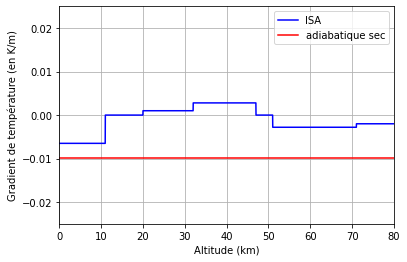

In [ ]:
## Comparaison graphique du gradient adiabatique sec et du gradient de température dans le modèle ISA

N = 10000
z = np.linspace(0,80,N)    # on définit un ensemble de valeurs de l'altitude exprimées en km

G = []                     # on définit une liste vide destinée à recueillir les valeurs du gradient de température ISA
for zz in z:               # pour chaque valeur de l'altitude, on calcule la valeur du gradient de température ISA 
  G.append(kISA(zz*1000))  # et l'on ajoute cette valeur à la liste G

# on trace les deux gradients en fonction de l'altitude
plt.plot(z, G, 'b', label='ISA')                                     # graphe du gradient de température ISA                          
plt.plot((0,N), (Gamma_a,Gamma_a), 'r', label='adiabatique sec' )    # représentation de la valeur constante Gamma_a
# on enrichit le graphe avec des labels et une légende
plt.axis([0, 80, -0.025, 0.025])
plt.xlabel('Altitude (km)')
plt.ylabel('Gradient de température (en K/m)')
plt.legend(), plt.grid()
plt.show()

On constate que le gradient de température du modèle ISA est en tout point supérieur au gradient adiabatique sec. La modèle ISA correspond donc à un modèle d'atmosphère stable vis-à-vis des mouvements verticaux de convection.

### Un cas particulier

On souhaite analyser la stabilité locale de l'atmosphère dans son état révélé par le sondage mentionné plus haut. 


Pour ce faire, on choisit un point $A$ sur la courbe d'état et l'on compare en ce point le gradient effectif de température au gradient adiabatique sec.
Une façon commode d'opérer cette comparaison est de raisonner graphiquement en s'appuyant sur le tracé de la courbe isentropique qui passe par le point $A$.

In [ ]:
## Définition du point d'état A par sélection de la pression et de la température

nA = 399                 # on choisit arbitrairement le 400ème point du sondage
PA = P_sondage[nA]  
TA = T_sondage[nA]
print ('En A: T= %.2f K'% TA ,' et P= %.2f Pa'% PA )


En A: T= 259.24 K  et P= 61330.00 Pa


**A vous de jouer**

> Ecrire une fonction ```Padsec``` qui admet les valeurs T, Ti et Pref comme paramètres et qui renvoie la valeur de la pression pour une évolution adiabatique réversible d'un gaz parfait depuis l'état (Ti,Pref) jusqu'à un état où la valeur de la température est T.

In [ ]:
#@title
## Construction de l'isentropique passant par A

def Padsec(T, Ti, Pref):
    """
    Renvoie la valeur de la pression P (en Pa) à une température (T en K) 
    en utilisant la loi de Laplace du gaz parfait ; 
    l'état de départ est (Pref, Ti).
    """
    return Pref*(Ti/T)**(gamma/(1-gamma))

In [ ]:
# Cette cellule de code vide est à vous

In [ ]:

Tmin, Tmax = -80.0, 50.0                  # en °C
TempC = np.linspace(Tmin, Tmax, 1000)     # on définit un tableau avec 1000 valeurs de températures en degrés Celsius
TempK = TempC + 273                       # conversion des températures précédentes en K

P_isoS_A = Padsec(TempK, TA, PA)          # on calcule les pressions correspondantes pour l'isentropique qui passe par A


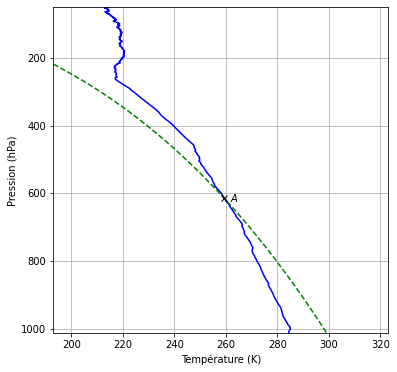

In [ ]:
## Comparaison graphique 

plt.figure(figsize = (6,6))
plt.plot(T_sondage, P_sondage*1.e-2, 'b')       # courbe d'état obtenue par sondage 
plt.plot(TempK, P_isoS_A*1.e-2, 'g--')          # courbe adiabatique réversible qui passe par A
# on matérialise le point A sur le graphe
plt.plot(TA, PA*1.e-2, 'kx')
plt.text(TA, PA*1.e-2, r"  $A$", verticalalignment = 'center')
# mise en forme du graphe
plt.axis([193,323,1013,50])             
plt.ylabel(r"Pression (hPa)")
plt.xlabel(r"Température (K)")
plt.grid() 
plt.show()

On imagine qu'une particule d'air, initialement dans l'état d'équilibre thermodynamique repéré par $A$, se déplace verticalement et subit une détente adiabatique et réversible. Le point d'état de la particule de fluide suit la courbe adiabatique réversible.


*   Pour une ascension modérée, la pression diminue et le graphe ci-dessus montre alors que la particule d'air se trouve à une température inférieure à celle de l'air environnant. Sa flottabilité est alors orientée vers le bas, elle retombe.
*   Pour une descente modérée, la pression augmente et le graphe ci-dessus montre que la particule d'air se réchauffe, sa température est supérieure à celle de l'air environnant, sa flottabilité est orientée vers le haut. Elle remonte.

On conclut que l'atmosphère est *stable* en $A$.

Il est maintenant pertinent de généraliser cette étude en tout point de la courbe d'état de l'atmosphère. On présente dans le paragraphe suivant la construction d'un diagramme particulier, l'émagramme, qui permet de répondre à cette problématique.

## L'émagramme

L'état thermodynamique d'une particule d'air est décrit par sa pression et sa température. Or, dans l'atmosphère, la température et la pression sont accessibles par la mesure (ballon sonde). On convient donc de construire un diagramme thermodynamique, appelé **émagramme**, où l'on porte la pression en ordonnée (le météorologue associe cette coordonnée de pression à un axe vertical où est portée l'altitude en raison de la dépendance univoque de la pression vis-à-vis de l'altitude) et la température en abscisse. On complète ce diagramme par un réseau de courbes d'évolution *adiabatique réversible* et par les mesures issues d'un sondage de l'atmosphère (cet ensemble de mesures constitue la *courbe d'état* de l'atmosphère).

Sur un émagramme, l'évolution isobare d'une particule d'air se traduit par un déplacement horizontal du point représentatif de l'état d'équilibre thermodynamique de cette particule d'air, une évolution isotherme par un déplacement vertical de ce même point et une évolution adiabatique réversible par un déplacement le long de la courbe adiabatique réversible passant par ce point.

Il est possible de construire des émagrammes plus réalistes en tenant compte de la vapeur d'eau contenue dans l'atmosphère et de ses possibles changements d'état. On choisit ici, par souci de simplicité, de construire avec Python un émagramme pour une atmosphère sèche (*i.e.* sans vapeur d'eau).

L'émagramme est ensuite utilisé pour juger de la stabilité de l'atmosphère représentée par sa courbe d'état.

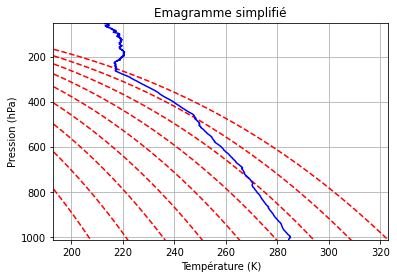

In [ ]:
# Définition d'un tableau avec les différentes valeurs de température initiale au sol (T0) pour une adiabatique réversible donnée
Tref = 273.15
ti= np.linspace(Tmin,Tmax,10)
Ti = ti + Tref

## Tracé du réseau des adiabatiques réversibles
# Pour chaque température initiale, on calcule la pression pour différentes températures et on trace l'adiabatique réversible sèche correspondante
for t in ti:
    T = t+Tref
    TempC=np.linspace(Tmin,Tmax,1000)   # on définit un tableau avec 100 valeurs de températures en degrés Celsius
    TempK=TempC+Tref                     # même liste avec des températures en K
    P = []                              # on crée une liste vide
    for tempK in TempK:
        P.append(Padsec(tempK,T,1013))  # on ajoute à la liste chaque valeur de pression calculée avec la loi de Laplace
    plt.plot(TempK,P,'r--')             # on trace l'adiabatique réversible

## Mesures d'un sondage atmosphérique
plt.plot(T_sondage,P_sondage*1.e-2,'b') # on trace les points correspondants au sondage atmosphérique

## Mise en forme du graphe
plt.axis([193,323,1013,50])             # on définit les limites des axes
plt.ylabel(r"Pression (hPa)")           # on ajoute un label sur l'axe des ordonnées
plt.xlabel(r"Température (K)")          # on ajoute un label sur l'axe des abscisses
plt.title("Emagramme simplifié")        # on ajoute un titre
plt.grid()                              # on ajoute une grille
plt.show()

L'examen de l'émagramme conduit à la conclusion que le profil d'atmosphère issu du sondage est *stable* en chacun des points représentés sur la courbe d'état car le gradient de température est supérieur, en tout point, au gradient adiabatique sec.

## Les oscillations verticales d'une particule d'air dans une atmosphère stable

L'analyse qualitative de la stabilité de l'atmosphère au point $A$ menée ci-dessus laisse entrevoir la possibilité d'un mouvement d'oscillation d'une particule d'air autour de sa position d'équilibre stable. À quelle fréquence particulière se mouvement se fait-il ?

On écrit la deuxième loi de Newton pour la particule d'air considérée, de masse $m_{\rm p}$, soumise à son poids et à la poussée d'Archimède (*flottabilité*).

En projection selon l'axe vertical ascendant 

$$\,m_{\rm p}\,\ddot{\varepsilon} = \vec{F}\cdot\vec{e_z} = - \left[1-\dfrac{T_{\rm p}(z_0+\varepsilon)}{T(z_0+\varepsilon)}\right]m_{\rm p}\,g$$

Or, par DL à l'ordre 1 en $\varepsilon$ au voisinage de $z_0$, on a

$$\dfrac{T_{\rm p}(z_0+\varepsilon)}{T(z_0+\varepsilon)} \underset{{\rm DL}_1}{=} \dfrac{T_{\rm p}(z_0)}{T(z_0)}+\varepsilon\,\dfrac{{\rm d}}{{\rm d}z}\left[\dfrac{T_{\rm p}}{T}\right](z_0) = 1+\dfrac{\varepsilon}{T(z_0)}\left[\dfrac{{\rm d}T_{\rm p}}{{\rm d}z}(z_0)-\dfrac{{\rm d}T}{{\rm d}z}(z_0)\right]$$

D'où

$$\ddot{\varepsilon} + \dfrac{g}{T(z_0)}\left[\dfrac{{\rm d}T}{{\rm d}z}(z_0)-\dfrac{{\rm d}T_{\rm p}}{{\rm d}z}(z_0)\right]\times\varepsilon = 0$$

soit encore:

$$\ddot{\varepsilon} + \dfrac{g}{T(z_0)}\left[\dfrac{{\rm d}T}{{\rm d}z}(z_0)-\Gamma_a\right]\times\varepsilon = 0$$

La fréquence propre des oscillations, appelée *fréquence de Brunt-Väisälä*, s'exprime donc ainsi:

$$N(z_0)=\dfrac{1}{2\pi}\sqrt{\dfrac{g}{T(z_0)}\left[\dfrac{{\rm d}T}{{\rm d}z}(z_0)-\Gamma_a\right]}$$

Elle renseigne sur le gradient de température atmosphérique à l'altitude $z_0$. Estimons sa valeur au point $A$ considéré précédemment. Il convient tout d'abord d'estimer le gradient de température en $A$:

$$
\dfrac{{\rm d}T}{{\rm d}z}(A)=\dfrac{{\rm d}T}{{\rm d}P}(A)\cdot\dfrac{{\rm d}P}{{\rm d}z}(A)\,,
$$

soit, en utilisant l'équation de l'équilibre hydrostatique et le modèle du gaz parfait :

$$
\dfrac{{\rm d}T}{{\rm d}z}(A)=-\dfrac{{\rm d}T}{{\rm d}P}(A)\cdot\dfrac{M_a g}{R T(A)}P(A)\,.
$$

In [ ]:
## Estimation du gradient de température au point A
dTdz = -(T_sondage[nA+1]-T_sondage[nA-1])/(P_sondage[nA+1]-P_sondage[nA-1])*(M_a*g*PA)/(R*TA)
print ('dT/dz = %.1e K/m' % dTdz)

dT/dz = -8.1e-03 K/m


**A vous de jouer**

> Calculer la valeur de la fréquence de Brunt-Vaïsälä au point A et l'exprimer d'abord en secondes puis la convertir en minutes et secondes.

In [ ]:
#@title
## Estimation de la fréquence d'oscillation au point A
NBV = np.sqrt(g*(dTdz-Gamma_a)/TA)/(2*np.pi)
Periode = np.floor(1./NBV)
Minutes = np.floor(Periode)//60     # l'opération // renvoie le quotient de la division euclidienne
Secondes = np.floor(Periode)%60     # l'opérateur % renvoie le reste de la division euclidienne
print ('N = %.2e Hz,' % NBV,'ce qui correspond à une période voisine de %.0f s soit' % Periode,'%.0f minutes' % Minutes,'et %.0f secondes.' % Secondes)

N = 1.27e-03 Hz, ce qui correspond à une période voisine de 787 s soit 13 minutes et 7 secondes.


In [ ]:
# Cette cellule de code est à vous !

La valeur obtenue est en bon accord avec les ordres de grandeur usuellements constatés. La fréquence de Brunt-Väisälä est la fréquence propre caractéristique des oscillations d'un fluide stratifié en équilibre dans le champ de pesanteur. Elle est représentative de cette stratification (elle joue également un rôle important en physique stellaire).

Il arrive qu'un vent horizontal force l'air à s'élever pour passer au-dessus d'un relief ([soulèvement orographique](https://fr.wikipedia.org/wiki/Soul%C3%A8vement_orographique)). Le passage des masses d'air au-dessus de ce relief excite leur oscillation à la fréquence propre de Brunt-Väisälä. Il en résulte la formation de nuages striés caractérisques, organisés en bandes parallèles.
Ce phénomène est visibile sur la photographie suivante qui révèle l'existence d'un sillage en aval de l'île d'Amsterdam.

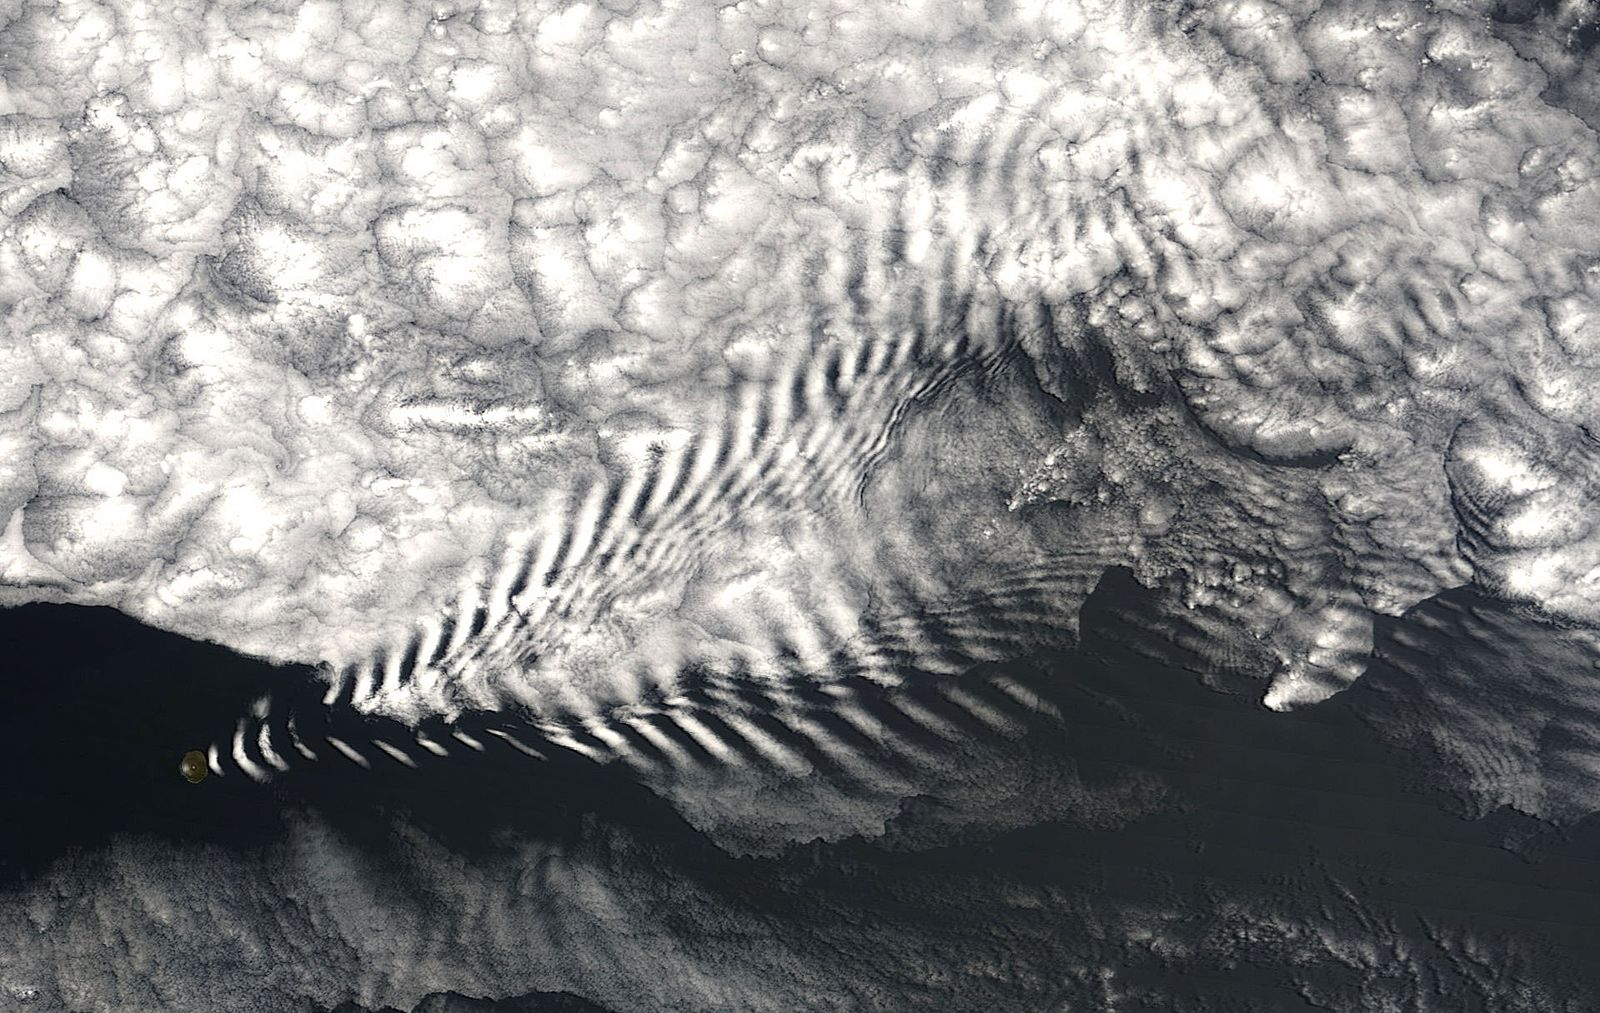
*Motif de nuages formé par des ondes de gravité en aval de l'île d'Amsterdam (NASA, 19 décembre 2005)*

![](/content/Wave_cloud.jpg)

**A vous de jouer** (utilisation plus avancée des tableaux ```numpy```)

> Pour juger de la stabilité d'un profil d'atmosphère, les météorologues ont l'habitude de tracer $N^2$ en fonction de l'altitude (ou de la pression puisque c'est équivalent). Les zones où $N^2\leq 0$ sont *instables*.
*   Construire deux tableaux en prenant 1 point des tableaux ```T_sondage``` et ```P_sondage```sur 50, par exemple, de façon à lisser les données.
*   Construire un tableau contenant les valeurs locales approchées du gradient de température (selon le même schéma de calcul que celui qu'on a utilisé au point $A$). Pour effectuer cette opération, il est recommandé d'utiliser les propriétés de [calcul vectoriel](https://ue12-python-numerique.readthedocs.io/fr/latest/2-03-numpy-vectorization.html) et de [coupe](https://ue12-python-numerique.readthedocs.io/fr/latest/2-04-numpy-indexing-slicing.html) avec les tableaux ```numpy``` (il s'agit là d'une utilisation plus avancée de Python).
*   Construire un tableau contenant les valeurs de la fréquence de Brunt-Väisälä locale au carré.
*   Produire le graphe où $N^2$ figure an abscisse et la pression en ordonnée.


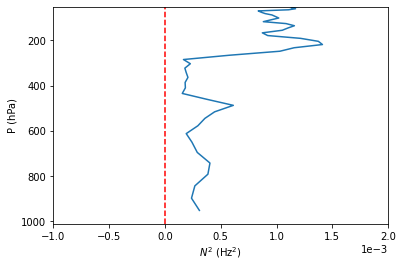

In [ ]:
#@title
p = 50                      # on choisit la périodicité avec laquelle on prélève les valeurs dans les 2 tableaux initiaux
Ts=T_sondage[::p]           # on extrait les éléments de T_sondage, du premier
                            # au dernier avec une périodicité p
Ps=P_sondage[::p]           # idem pour Ps
# on calcule ensuite le tableau qui contient les valeurs du gradient en utilisant des coupes des tableaux Ts et Ps (ce qui revient à décaler les indices).
# Ts[2:] désigne le tableau Ts à l'exclusion des 2 premiers éléments; Ts[:-2] désigne le tableau Ts privé de ces deux derniers éléments. La ligne de code 
# qui suit remplace avantageusement une boucle itérative.
GradT = -(Ts[2:]-Ts[:-2])/(Ps[2:]-Ps[:-2])*(M_a*g*Ps[1:-1])/(R*Ts[1:-1])
# On calcule ensuite le tableau des fréquences de Brunt-Väisälä au carré et on trace le graphe.
Freq2_BV = (g/4*np.pi**2)*(GradT-Gamma_a)/Ts[1:-1]
plt.plot(Freq2_BV,Ps[1:-1]*1e-2)
plt.plot((0,0), (1013,50), 'r--')   # on place un axe vertical à N^2=0
plt.axis([-1.e-3,2e-3,1013,50])
plt.ticklabel_format(axis = 'x', style = 'sci', scilimits = (0,0))
plt.xlabel(r'$N^2$ $({\rm Hz}^2)$ ')
plt.ylabel('P (hPa)')
plt.show()


On conclut (malgré le bruit numérique introduit par le calcul numérique de la dérivée): $N^2\geq 0$ en tout point. Le profil d'atmosphère étudié est *stable*.

In [ ]:
# Cette cellule de code est à vous !

## Critère de stabilité vis-à-vis des mouvements verticaux de convection

La poussée d'Archimède est le terme moteur de la convection. Comme on vient de le voir, la différence de température entre la particule d'air déplacée et l'air environnant peut conduire à une flottabilité orientée vers le haut. Si les tranferts thermiques permettent de réduire cette différence de température, alors le contraste de masse volumique, et donc la pousée d'Archimède, est diminué. La conduction thermique est donc un phénomène défavorable à la convection. De même, le frottement visqueux limite l'amplitude du mouvement de la particule de fluide et s'avère donc défavorable à la convection.

La comparaison des temps caractéristiques avec lesquels ces différents phénomènes se manifestent est un bon moyen de comparer leur efficacité.

On considère une unique échelle spatiale caractéristique $a$. La méthode d'analyse la plus simple à mettre en oeuvre est celle de l'analyse dimensionnelle, que nous présentons ci-après. Elle s'appuie sur des éléments étudiés, séparément, dans le cadre des enseignements de mécanique et de thermodynamique.

### Temps caractéristique associé à la flottabilité

La durée nécessaire pour qu'une particule de masse $m_{\rm p}$ se déplace sur une distance $a$ sous l'effet d'une force constante de norme $F$ est donnée, par analyse dimensionnelle, sous la forme $\sqrt{\dfrac{a}{F/m_{\rm p}}}$. Dans le cas considéré ici, $F$ est la *flottabilité*: $F=\Delta\rho Vg$ où $\Delta\rho$ est la différence de masse volumique consécutive à une variation de température $\Delta T$: $\dfrac{\Delta\rho}{\rho}=\alpha\Delta T$ où $\alpha$ est un coefficient de dilatation (isobare). On obtient:

$$\tau_f \simeq\sqrt{\dfrac{a}{\alpha g\Delta T}}\,.$$

### Temps caractéristique associé au frottement visqueux

Pour estimer ce temps caractéristique, on envisage la force de frottement visqueux $-6\pi\eta r\vec{v}$ qui s'exerce sur une particule sphérique de rayon $r$. En tenant compte de la seule longueur caractéristique considérée, on obtient:

$$ \tau_v \simeq \dfrac{\rho a^2}{\eta}\,.$$

### Temps caractéristique de la conduction thermique

On peut utiliser avantageusement la notion de résistance thermique. En considérant une section $S$ et une longueur caractéristique $a$ : $R_{\rm th}=\dfrac{1}{\lambda }\dfrac{a}{S}$. La capacité thermique est donnée par : $C_{\rm th} = \rho S a c_p$. Le temps caractéristique $R_{\rm th}C_{\rm th}$ s'écrit donc ainsi:

$$\tau_c \simeq \dfrac{\rho c_p a^2}{\lambda}\,.$$

### Comparaison des temps caractéristiques

Un des trois phénomènes envisagés est plus efficace que les deux autres s'il se manifeste sur une échelle temporelle bien plus petite que les échelles temporelles caractéristiques des autres phénomènes envisagés. On forme donc le nombre sans dimension (*nombre de Rayleigh*) suivant:

$${\rm Ra}=\dfrac{\tau_v\tau_c}{\tau_f^2}=\dfrac{\rho^2 c_p a^4 \alpha g \Delta T}{a\eta\lambda}=\dfrac{\rho c_p a^3 \alpha g \Delta T}{\nu\lambda}=\dfrac{a^3 \alpha g \Delta T}{\nu D_{\rm th}}\,,$$

où $\nu=\eta/\rho$ est la viscosité cinématique.
Plus le nombre sans dimension $\dfrac{\tau_v\tau_c}{\tau_f^2}$ est grand, et plus la flottabilité est efficace: la convection se manifeste donc lorsque ce nombre sans dimension est suffisamment ~~petit~~ grand.

In [ ]:
## Critère de stabilité
def Ra(a,alpha,DeltaT,nu,Dth):
  return a**3*alpha*g*DeltaT/(nu*Dth)

print("Cas du manteau terrestre: Ra = %1.0e"%Ra(3e6,2.e-5,2000,1.e17,1.e-6))
print("Cas d'une pièce: Ra = %1.0e"%Ra(2,4.e-3,10,1.e-5,2.e-5))


Cas du manteau terrestre: Ra = 1e+08
Cas d'une pièce: Ra = 2e+10


Dans le cas du manteau terrestre, on constate que le maintien d'une différence de température sur une très grande extension spatiale est favorable à la convection et permet de dominer l'effet d'une viscosité considérable.
Dans le cas d'une pièce, la convection s'installe facilement, ce qui est un élément favorable à son chauffage dans son ensemble par un dispositif de chauffage localisé.

Cette étude peut-être transposée à l'étude de la stablité des océans. La salinité et la température sont deux facteurs d'influence de la flottabilité qui peuvent oeuvrer dans le même sens ou se contrarier.

# Conclusion

Au-delà du contenu scientifique, qui vient illustrer les attendus du programme de physique de PCSI, TPC1 et de BCPST1, ce document illustre la démarche de *modélisation* mise en avant dans les nouveaux programmes de CPGE. Le point de départ est le modèle usuel de l'atmosphère isotherme qui permet d'obtenir une courbe d'état $(T,P)$ par résolution analytique des équations fondamentales. Cependant, ce modèle ne permet pas de rendre compte de l'évolution conjointe de la pression et de la température telle qu'elle peut être observée dans l'atmosphère terrestre. Le modèle ISA s'avère, quant à lui, beaucoup plus satisfaisant. L'approche numérique apporte alors une véritable plus-value car elle permet d'accéder à des résultats qu'il serait particulièrement fastidieux d'obtenir par une approche analytique, par ailleurs sans grand intérêt sur le plan de la consolidation de capacités propres à la physique, ou sur le plan du contenu disciplinaire.
La mobilisation de l'outil numérique permet en outre de traiter des données authentiques et rend possible l'examen des conditions de stabilité d'un profil d'atmosphère. Cela donne un relief particulier à l'étude de l'équilibre thermodynamique de l'atmosphère et permet d'approfondir la réflexion sur la nature des phénomènes physiques sous-jacents. Une telle présentation contribue à donner une image plus fidèle de la thermodynamique de l'atmosphère.

## Bibliographie

Malardel, S. (2009). *Fondamentaux de Météorologie* (2ème édition). Toulouse, France: Cépaduès-Editions.

Dequincey, O. (2019). *Le nombre de Rayleigh: une approche "avec les mains"*. Repéré à https://planet-terre.ens-lyon.fr/ressource/nombre-Rayleigh-approche.xml. Page consultée le 5 mai 2021.

Bouvignies, O. (1999). L'émagramme 761 des météorologues. *Bulletin de l'Union des Physiciens, 815(2)*, 93-126. 